In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [3]:
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
# output_base_folder = Path("/home/ivan/temp/temp-benchmarking")
output_base_folder = Path("/iarai/home/ivan.svogor/git/storage-benchmarking/src/benchmark_output")


## Dataloader benchmark (num workers, batch size)

**parameters**

| param | range |
| --- | --- |
| num_workers |0, 2, 4, 8, 16 | 
| batch_size | 8, 16, 32, 64 | 
| num_fetch_workers | 4, 8, 16, 32 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |

Batch pool size is fixed to 10

**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentially or in parallel). This implementation takes N batches and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initially placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

```bash
 for fetch_impl in "threaded" "asyncio"; do
   for storage in "s3" "scratch"; do
     for batch_size in 8 16 32 64; do
       for num_workers in 0 2 4 8 16; do
         for num_fetch_workers in 4 8 16 32; do
           python3 benchmark/benchmark_dataloader.py --output_base_folder /iarai/home/ivan.svogor/git/storage-benchmarking/src/benchmark_output/dataloader \
           --dataset "${storage}"  \
           --num_fetch_workers "${num_fetch_workers}" \
           --num_workers  "${num_workers}" \
           --repeat 1 \
           --num_batches 50 \
           --batch_size "${batch_size}" \
           --prefetch_factor 2 \
           --fetch_impl "${fetch_impl}"
         done
       done
     done
   done
 done
```

In [4]:
group_by_dataloader = ["dataset", "batch_size", "fetch_impl", "prefetch_factor"]

In [5]:
s3_folder_filter="e2e1810rand/*benchmark_e2e_s3*"

In [6]:
# df_dataloader_s3_full = extract_pandas(output_base_folder, folder_filter="e2e-vanilla/*benchmark_e2e_s3*")
df_dataloader = extract_pandas(output_base_folder, folder_filter=s3_folder_filter)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 861/861 [02:16<00:00,  6.33it/s]


In [7]:
# df_dataloader[df_dataloader["fetch_impl"]=="asyncio"].index
# df_dataloader = df_dataloader[(df_dataloader.fetch_impl == "vanilla") & 
#                               (df_dataloader.fetch_impl == "threaded")]
# df_dataloader[df_dataloader.fetch_impl == "threaded"]
# df_dataloader[df_dataloader.fetch_impl=="vanilla"]

In [8]:
df_dataloader_async=df_dataloader[df_dataloader["fetch_impl"]=="asyncio"]
df_dataloader = df_dataloader[(df_dataloader.fetch_impl == "vanilla") | 
                              (df_dataloader.fetch_impl == "threaded")]

df_dataloader_threaded=df_dataloader[df_dataloader["fetch_impl"]=="threaded"]
df_dataloader = df_dataloader[(df_dataloader.fetch_impl == "vanilla")]

df_dataloader_vanilla=df_dataloader[df_dataloader["fetch_impl"]=="vanilla"]
del df_dataloader

In [9]:
df_dataloader_async

trace_name  trace_level function_name    elapsed  \
0                    (5)-get_item            5   __getitem__   0.003010   
1                    (5)-get_item            5   __getitem__   0.004965   
2                    (5)-get_item            5   __getitem__   0.007433   
3                    (5)-get_item            5   __getitem__   0.009920   
4                    (5)-get_item            5   __getitem__   0.012432   
...                           ...          ...           ...        ...   
1097                 (5)-get_item            5   __getitem__   0.034418   
1098                 (5)-get_item            5   __getitem__   0.034770   
1099                 (5)-get_item            5   __getitem__   0.034978   
1100  (4)-asyncmapdataset-fetcher            4         fetch   2.447407   
1101              (3)-worker_loop            3  _worker_loop  22.930038   

        time_start      time_end  process_time  process_time_start  \
0     1.634565e+09  1.634565e+09      0.006013            0.319220   
1     1.634565e+09  1.634565e+09      0.010770            0.319548   
2     1.634565e+09  1.634565e+09      0.013709            0.319816   
3     1.634565e+09  1.634565e+09      0.015777            0.320960   
4     1.634565e+09  1.634565e+09      0.018416            0.321709   
...            ...           ...           ...                 ...   
1097  1.634566e+09  1.634566e+09      0.046399            2.963176   
1098  1.634566e+09  1.634566e+09      0.046484            2.966272   
1099  1.634566e+09  1.634566e+09      0.046584            2.969191   
1100  1.634566e+09  1.634566e+09      2.920091            0.440455   
1101  1.634566e+09  1.634566e+09      3.947757            0.002962   

      process_time_end    pid  ...  momentum  weight_decay  pretrained  \
0             0.325233  28005  ...       0.9        0.0001       False   
1             0.330318  28005  ...       0.9        0.0001       False   
2             0.333525  28005  ...       0.9        0.0001       False   
3             0.336736  28005  ...       0.9        0.0001       False   
4             0.340125  28005  ...       0.9        0.0001       False   
...                ...    ...  ...       ...           ...         ...   
1097          3.009575   4975  ...       0.9        0.0001       False   
1098          3.012756   4975  ...       0.9        0.0001       False   
1099          3.015775   4975  ...       0.9        0.0001       False   
1100          3.360546   4975  ...       0.9        0.0001       False   
1101          3.950718   4975  ...       0.9        0.0001       False   

      system        node          release  \
0      Linux  lnx-slim-2  4.19.0-18-amd64   
1      Linux  lnx-slim-2  4.19.0-18-amd64   
2      Linux  lnx-slim-2  4.19.0-18-amd64   
3      Linux  lnx-slim-2  4.19.0-18-amd64   
4      Linux  lnx-slim-2  4.19.0-18-amd64   
...      ...         ...              ...   
1097   Linux  lnx-slim-2  4.19.0-18-amd64   
1098   Linux  lnx-slim-2  4.19.0-18-amd64   
1099   Linux  lnx-slim-2  4.19.0-18-amd64   
1100   Linux  lnx-slim-2  4.19.0-18-amd64   
1101   Linux  lnx-slim-2  4.19.0-18-amd64   

                                    version machine  \
0     #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
1     #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
2     #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
3     #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
4     #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
...                                     ...     ...   
1097  #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
1098  #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
1099  #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
1100  #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   
1101  #1 SMP Debian 4.19.208-1 (2021-09-29)  x86_64   

                                            source_file  \
0     /iarai/home/ivan.svogor/git/storage-benchmarki...   
1     /iarai/home/ivan.svogor/git/storage-benchmarki...   
2     /iarai/

In [10]:
df_s3_gpu_util = extract_gpu_utilization(output_base_folder, folder_filter=s3_folder_filter,device_id=0)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21/21 [00:16<00:00,  1.29it/s]


In [11]:
df_s3_gpu_util

run  \
0    20211018f151715_benchmark_e2e_s3_100_8_16_sync   
1    20211018f151952_benchmark_e2e_s3_200_8_16_sync   
2    20211018f152211_benchmark_e2e_s3_400_8_16_sync   
3    20211018f152422_benchmark_e2e_s3_600_8_16_sync   
4    20211018f152634_benchmark_e2e_s3_800_8_16_sync   
5   20211018f152847_benchmark_e2e_s3_1000_8_16_sync   
6   20211018f153103_benchmark_e2e_s3_1100_8_16_sync   
7    20211018f153320_benchmark_e2e_s3_100_8_16_sync   
8    20211018f153555_benchmark_e2e_s3_200_8_16_sync   
9    20211018f153809_benchmark_e2e_s3_400_8_16_sync   
10   20211018f154018_benchmark_e2e_s3_600_8_16_sync   
11   20211018f154230_benchmark_e2e_s3_800_8_16_sync   
12  20211018f154441_benchmark_e2e_s3_1000_8_16_sync   
13  20211018f154654_benchmark_e2e_s3_1100_8_16_sync   
14   20211018f154908_benchmark_e2e_s3_100_8_16_sync   
15   20211018f155142_benchmark_e2e_s3_200_8_16_sync   
16   20211018f155401_benchmark_e2e_s3_400_8_16_sync   
17   20211018f155609_benchmark_e2e_s3_600_8_16_sync   
18   20211018f155822_benchmark_e2e_s3_800_8_16_sync   
19  20211018f160034_benchmark_e2e_s3_1000_8_16_sync   
20  20211018f160248_benchmark_e2e_s3_1100_8_16_sync   

                                                  gpu   gpu_mean  gpu_median  \
0   [4.0, 75.0, 76.0, 81.0, 81.0, 48.0, 60.0, 51.0...  67.312500        70.0   
1   [8.0, 86.0, 100.0, 71.0, 82.0, 66.0, 83.0, 100...  72.708333        75.5   
2   [14.0, 100.0, 32.0, 69.0, 16.0, 66.0, 69.0, 10...  57.516667        61.0   
3   [22.0, 49.0, 22.0, 49.0, 16.0, 100.0, 22.0, 85...  56.725000        53.0   
4   [27.0, 60.0, 56.0, 90.0, 30.0, 100.0, 19.0, 90...  59.133333        54.5   
5   [26.0, 100.0, 34.0, 100.0, 31.0, 100.0, 31.0, ...  57.291667        39.0   
6   [23.0, 97.0, 28.0, 82.0, 30.0, 100.0, 30.0, 10...  54.090909        38.5   
7   [4.0, 89.0, 21.0, 90.0, 92.0, 84.0, 86.0, 39.0...  66.025000        69.0   
8   [64.0, 60.0, 65.0, 100.0, 14.0, 94.0, 92.0, 46...  72.941667        80.5   
9   [16.0, 51.0, 33.0, 60.0, 55.0, 100.0, 24.0, 73...  56.333333        52.5   
10  [17.0, 100.0, 21.0, 69.0, 14.0, 100.0, 19.0, 1...  54.425000        58.5   
11  [32.0, 100.0, 34.0, 35.0, 29.0, 64.0, 23.0, 10...  56.300000        38.0   
12  [39.0, 100.0, 19.0, 93.0, 37.0, 40.0, 40.0, 64...  58.916667        58.0   
13  [39.0, 100.0, 67.0, 100.0, 42.0, 100.0, 28.0, ...  58.636364        58.0   
14  [36.0, 76.0, 60.0, 63.0, 37.0, 81.0, 92.0, 61....  67.204167        69.0   
15  [31.0, 100.0, 72.0, 100.0, 38.0, 100.0, 63.0, ...  70.225000        76.5   
16  [16.0, 100.0, 76.0, 100.0, 16.0, 64.0, 98.0, 4...  67.483333        77.0   
17  [20.0, 100.0, 30.0, 73.0, 20.0, 100.0, 14.0, 9...  57.800000        58.0   
18  [32.0, 42.0, 27.0, 100.0, 20.0, 76.0, 28.0, 10...  56.466667        49.5   
19  [38.0, 100.0, 17.0, 69.0, 39.0, 100.0, 32.0, 1...  55.916667        49.5   
20  [31.0, 100.0, 24.0, 68.0, 36.0, 49.0, 14.0, 54...  48.136364        36.5   

          std  
0   18.715809  
1   26.445666  
2   32.500509  
3   33.691978  
4   32.301428  
5   32.052664  
6   29.609441  
7   21.176427  
8   28.844785  
9   32.813954  
10  32.943806  
11  33.279774  
12  27.404253  
13  26.903101  
14  19.724033  
15  28.608700  
16  31.629887  
17  37.210348  
18  31.757134  
19  26.372202  
20  27.442991

In [12]:
group_by_dataloader = ["dataset", "batch_size", "fetch_impl", "prefetch_factor"]

In [13]:
# print(df_dataloader.groupby(group_by_dataloader).groups.keys())

In [14]:
# group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool", "fetch_impl", "gpu_median"]

In [15]:
df_dataloader_async = pd.merge(df_dataloader_async, df_s3_gpu_util, left_on='run', right_on='run')
df_dataloader_threaded = pd.merge(df_dataloader_threaded, df_s3_gpu_util, left_on='run', right_on='run')
df_dataloader_vanilla = pd.merge(df_dataloader_vanilla, df_s3_gpu_util, left_on='run', right_on='run')

In [16]:
display(get_run_stats(df_dataloader_async, group_by=group_by_dataloader))

downloaded data [B]  \
dataset batch_size fetch_impl prefetch_factor run                                                                    
s3      100        asyncio    4               20211018f154908_benchmark_e2e_s3_100_8_16_sync                   0.0   
        200        asyncio    4               20211018f155142_benchmark_e2e_s3_200_8_16_sync                   0.0   
        400        asyncio    4               20211018f155401_benchmark_e2e_s3_400_8_16_sync                   0.0   
        600        asyncio    4               20211018f155609_benchmark_e2e_s3_600_8_16_sync                   0.0   
        800        asyncio    4               20211018f155822_benchmark_e2e_s3_800_8_16_sync                   0.0   
        1000       asyncio    4               20211018f160034_benchmark_e2e_s3_1000_8_16_sync                  0.0   
        1100       asyncio    4               20211018f160248_benchmark_e2e_s3_1100_8_16_sync                  0.0   

                                                                                                 time_start  \
dataset batch_size fetch_impl prefetch_factor run                                                             
s3      100        asyncio    4               20211018f154908_benchmark_e2e_s3_100_8_16_sync   1.634565e+09   
        200        asyncio    4               20211018f155142_benchmark_e2e_s3_200_8_16_sync   1.634565e+09   
        400        asyncio    4               20211018f155401_benchmark_e2e_s3_400_8_16_sync   1.634565e+09   
        600        asyncio    4               20211018f155609_benchmark_e2e_s3_600_8_16_sync   1.634565e+09   
        800        asyncio    4               20211018f155822_benchmark_e2e_s3_800_8_16_sync   1.634566e+09   
        1000       asyncio    4               20211018f160034_benchmark_e2e_s3_1000_8_16_sync  1.634566e+09   
        1100       asyncio    4               20211018f160248_benchmark_e2e_s3_1100_8_16_sync  1.634566e+09   

                                                                                                   time_end  \
dataset batch_size fetch_impl prefetch_factor run                                                             
s3      100        asyncio    4               20211018f154908_benchmark_e2e_s3_100_8_16_sync   1.634565e+09   
        200        asyncio    4               20211018f155142_benchmark_e2e_s3_200_8_16_sync   1.634565e+09   
        400        asyncio    4               20211018f155401_benchmark_e2e_s3_400_8_16_sync   1.634565e+09   
        600        asyncio    4               20211018f155609_benchmark_e2e_s3_600_8_16_sync   1.634565e+09   
        800        asyncio    4               20211018f155822_benchmark_e2e_s3_800_8_16_sync   1.634566e+09   
        1000       asyncio    4               20211018f160034_benchmark_e2e_s3_1000_8_16_sync  1.634566e+09   
        1100       asyncio    4               20211018f160248_benchmark_e2e_s3_1100_8_16_sync  1.634566e+09   

                                                                                               total_elpased_time [s]  \
dataset batch_size fetch_impl prefetch_factor run                                                                       
s3      100        asyncio    4               20211018f154908_benchmark_e2e_s3_100_8_16_sync               147.469059   
        200        asyncio    4               20211018f155142_benchmark_e2e_s3_200_8_16_sync               131.789709   
        400        asyncio    4               20211018f155401_benchmark_e2e_s3_400_8_16_sync               121.628234   
        600        asyncio    4               20211018f155609_benchmark_e2e_s3_600_8_16_sync               126.479575   
        800        asyncio    4               20211018f155822_benchmark_e2e_s3_800_8_16_sync               125.240954   
        1000       asyncio    4               20211018f160034_benchmark_e2e_s3_1000_8_16_sync              127.125050   
        1100       asyncio    4               20211018f160248_be

In [17]:
display(get_run_stats(df_dataloader_threaded, group_by=group_by_dataloader))

downloaded data [B]  \
dataset batch_size fetch_impl prefetch_factor run                                                                    
s3      100        threaded   4               20211018f153320_benchmark_e2e_s3_100_8_16_sync                   0.0   
        200        threaded   4               20211018f153555_benchmark_e2e_s3_200_8_16_sync                   0.0   
        400        threaded   4               20211018f153809_benchmark_e2e_s3_400_8_16_sync                   0.0   
        600        threaded   4               20211018f154018_benchmark_e2e_s3_600_8_16_sync                   0.0   
        800        threaded   4               20211018f154230_benchmark_e2e_s3_800_8_16_sync                   0.0   
        1000       threaded   4               20211018f154441_benchmark_e2e_s3_1000_8_16_sync                  0.0   
        1100       threaded   4               20211018f154654_benchmark_e2e_s3_1100_8_16_sync                  0.0   

                                                                                                 time_start  \
dataset batch_size fetch_impl prefetch_factor run                                                             
s3      100        threaded   4               20211018f153320_benchmark_e2e_s3_100_8_16_sync   1.634564e+09   
        200        threaded   4               20211018f153555_benchmark_e2e_s3_200_8_16_sync   1.634564e+09   
        400        threaded   4               20211018f153809_benchmark_e2e_s3_400_8_16_sync   1.634564e+09   
        600        threaded   4               20211018f154018_benchmark_e2e_s3_600_8_16_sync   1.634564e+09   
        800        threaded   4               20211018f154230_benchmark_e2e_s3_800_8_16_sync   1.634565e+09   
        1000       threaded   4               20211018f154441_benchmark_e2e_s3_1000_8_16_sync  1.634565e+09   
        1100       threaded   4               20211018f154654_benchmark_e2e_s3_1100_8_16_sync  1.634565e+09   

                                                                                                   time_end  \
dataset batch_size fetch_impl prefetch_factor run                                                             
s3      100        threaded   4               20211018f153320_benchmark_e2e_s3_100_8_16_sync   1.634564e+09   
        200        threaded   4               20211018f153555_benchmark_e2e_s3_200_8_16_sync   1.634564e+09   
        400        threaded   4               20211018f153809_benchmark_e2e_s3_400_8_16_sync   1.634564e+09   
        600        threaded   4               20211018f154018_benchmark_e2e_s3_600_8_16_sync   1.634565e+09   
        800        threaded   4               20211018f154230_benchmark_e2e_s3_800_8_16_sync   1.634565e+09   
        1000       threaded   4               20211018f154441_benchmark_e2e_s3_1000_8_16_sync  1.634565e+09   
        1100       threaded   4               20211018f154654_benchmark_e2e_s3_1100_8_16_sync  1.634565e+09   

                                                                                               total_elpased_time [s]  \
dataset batch_size fetch_impl prefetch_factor run                                                                       
s3      100        threaded   4               20211018f153320_benchmark_e2e_s3_100_8_16_sync               148.276124   
        200        threaded   4               20211018f153555_benchmark_e2e_s3_200_8_16_sync               128.075762   
        400        threaded   4               20211018f153809_benchmark_e2e_s3_400_8_16_sync               122.404637   
        600        threaded   4               20211018f154018_benchmark_e2e_s3_600_8_16_sync               124.760147   
        800        threaded   4               20211018f154230_benchmark_e2e_s3_800_8_16_sync               124.758080   
        1000       threaded   4               20211018f154441_benchmark_e2e_s3_1000_8_16_sync              126.455165   
        1100       threaded   4               20211018f154654_be

In [18]:
display(get_run_stats(df_dataloader_vanilla, group_by=group_by_dataloader))

downloaded data [B]  \
dataset batch_size fetch_impl prefetch_factor run                                                                    
s3      100        vanilla    4               20211018f151715_benchmark_e2e_s3_100_8_16_sync                   0.0   
        200        vanilla    4               20211018f151952_benchmark_e2e_s3_200_8_16_sync                   0.0   
        400        vanilla    4               20211018f152211_benchmark_e2e_s3_400_8_16_sync                   0.0   
        600        vanilla    4               20211018f152422_benchmark_e2e_s3_600_8_16_sync                   0.0   
        800        vanilla    4               20211018f152634_benchmark_e2e_s3_800_8_16_sync                   0.0   
        1000       vanilla    4               20211018f152847_benchmark_e2e_s3_1000_8_16_sync                  0.0   
        1100       vanilla    4               20211018f153103_benchmark_e2e_s3_1100_8_16_sync                  0.0   

                                                                                                 time_start  \
dataset batch_size fetch_impl prefetch_factor run                                                             
s3      100        vanilla    4               20211018f151715_benchmark_e2e_s3_100_8_16_sync   1.634563e+09   
        200        vanilla    4               20211018f151952_benchmark_e2e_s3_200_8_16_sync   1.634563e+09   
        400        vanilla    4               20211018f152211_benchmark_e2e_s3_400_8_16_sync   1.634563e+09   
        600        vanilla    4               20211018f152422_benchmark_e2e_s3_600_8_16_sync   1.634563e+09   
        800        vanilla    4               20211018f152634_benchmark_e2e_s3_800_8_16_sync   1.634564e+09   
        1000       vanilla    4               20211018f152847_benchmark_e2e_s3_1000_8_16_sync  1.634564e+09   
        1100       vanilla    4               20211018f153103_benchmark_e2e_s3_1100_8_16_sync  1.634564e+09   

                                                                                                   time_end  \
dataset batch_size fetch_impl prefetch_factor run                                                             
s3      100        vanilla    4               20211018f151715_benchmark_e2e_s3_100_8_16_sync   1.634563e+09   
        200        vanilla    4               20211018f151952_benchmark_e2e_s3_200_8_16_sync   1.634563e+09   
        400        vanilla    4               20211018f152211_benchmark_e2e_s3_400_8_16_sync   1.634563e+09   
        600        vanilla    4               20211018f152422_benchmark_e2e_s3_600_8_16_sync   1.634564e+09   
        800        vanilla    4               20211018f152634_benchmark_e2e_s3_800_8_16_sync   1.634564e+09   
        1000       vanilla    4               20211018f152847_benchmark_e2e_s3_1000_8_16_sync  1.634564e+09   
        1100       vanilla    4               20211018f153103_benchmark_e2e_s3_1100_8_16_sync  1.634564e+09   

                                                                                               total_elpased_time [s]  \
dataset batch_size fetch_impl prefetch_factor run                                                                       
s3      100        vanilla    4               20211018f151715_benchmark_e2e_s3_100_8_16_sync               148.730373   
        200        vanilla    4               20211018f151952_benchmark_e2e_s3_200_8_16_sync               132.783923   
        400        vanilla    4               20211018f152211_benchmark_e2e_s3_400_8_16_sync               124.419125   
        600        vanilla    4               20211018f152422_benchmark_e2e_s3_600_8_16_sync               125.347263   
        800        vanilla    4               20211018f152634_benchmark_e2e_s3_800_8_16_sync               126.437667   
        1000       vanilla    4               20211018f152847_benchmark_e2e_s3_1000_8_16_sync              129.129096   
        1100       vanilla    4               20211018f153103_be

In [22]:
display(get_thread_stats(df_dataloader_async,group_by=group_by_dataloader))

time_start_thread  time_end_thread  total_elapsed_thread  \
threading_ident                                                             
139663780083456       1.634476e+09     1.634477e+09           1567.352836   
139663893669632       1.634476e+09     1.634477e+09           2588.808013   
139663902062336       1.634476e+09     1.634477e+09           2586.189216   
139664098842368       1.634476e+09     1.634477e+09           2584.500788   
139664107235072       1.634476e+09     1.634476e+09           1016.439260   
...                            ...              ...                   ...   
140481583294208       1.634477e+09     1.634478e+09           2570.333782   
140481625241344       1.634477e+09     1.634478e+09           2570.987692   
140481667188480       1.634477e+09     1.634478e+09           2572.772370   
140481751082752       1.634477e+09     1.634478e+09           2571.727631   
140481834977024       1.634477e+09     1.634478e+09           2574.852517   

                dataset  batch_size fetch_impl  prefetch_factor  \
threading_ident                                                   
139663780083456      s3         400    asyncio                4   
139663893669632      s3         400    asyncio                4   
139663902062336      s3         400    asyncio                4   
139664098842368      s3         400    asyncio                4   
139664107235072      s3         400    asyncio                4   
...                 ...         ...        ...              ...   
140481583294208      s3        1100    asyncio                4   
140481625241344      s3        1100    asyncio                4   
140481667188480      s3        1100    asyncio                4   
140481751082752      s3        1100    asyncio                4   
140481834977024      s3        1100    asyncio                4   

                 elapsed_thread  elapsed_processing  
threading_ident                                      
139663780083456      123.685708           12.672061  
139663893669632      204.672910           12.648513  
139663902062336      204.627953           12.638494  
139664098842368      204.568422           12.633919  
139664107235072       78.196852           12.998468  
...                         ...                 ...  
140481583294208      236.988500           10.845816  
140481625241344      236.959932           10.849884  
140481667188480      236.970878           10.856914  
140481751082752      236.939999           10.853919  
140481834977024      236.951157           10.866596  

[156 rows x 9 columns]

### S3 Event plots of dataloading

#### S3


In [19]:
df_dataloader_s3_async=df_dataloader_async[df_dataloader_async["dataset"]=="s3"]
df_dataloader_s3_threaded=df_dataloader_threaded[df_dataloader_threaded["dataset"]=="s3"]
df_dataloader_s3_vanilla=df_dataloader_vanilla[df_dataloader_vanilla["dataset"]=="s3"]

In [20]:
num_workers = np.unique(df_dataloader_s3_async["num_workers"].to_numpy())
fetch_workers = np.unique(df_dataloader_s3_async["num_fetch_workers"].to_numpy())
batch_sizes = np.unique(df_dataloader_s3_async["batch_size"].to_numpy())
print(num_workers, fetch_workers, batch_sizes)

[8] [16] [ 100  200  400  600  800 1000 1100]


In [36]:
def print_rate_table(df):
    rate_matrix = pd.DataFrame(columns=["batch_size", "num_fetch_workers", "num_workers", "rate"])
    for i, batch_size in enumerate(batch_sizes):
        for j, prefetch_factor in enumerate(np.unique(df["prefetch_factor"].to_numpy())):
            run = df[(df["num_fetch_workers"]==fetch_workers[0]) & 
                     (df["prefetch_factor"]==prefetch_factor) &
                     (df["num_workers"]==num_workers[0]) &
                     (df["batch_size"]==batch_size)]["run"].iloc[0]
            mbps, mbitps = plot_events_timeline(df[df["run"]==run], 
                                                summary_only=True, 
                                                verbose=False)
            if "GB" in list(mbitps)[0]:
                r = float(list(mbitps)[0].replace("GB", "")) * 1000
            else:
                if list(mbitps)[0].replace("MB", "") != "0 Bytes":
                    r = float(list(mbitps)[0].replace("MB", ""))
                else: 
                    r = 0
            median = df_s3_gpu_util[df_s3_gpu_util["run"]==run]["gpu_mean"]
            rate_matrix = rate_matrix.append({'batch_size': batch_size, 
                                              'num_fetch_workers': fetch_workers, 
                                              'pf': prefetch_factor, 
                                              'num_workers': num_workers,
                                              'gpu_median': list(median)[0],
                                              'rate': r}, ignore_index=True)    
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(rate_matrix.sort_values(["rate"], ascending=False))
    return rate_matrix

#### Threaded

In [37]:
print(np.unique(df_dataloader_s3_threaded["num_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["num_fetch_workers"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["batch_size"].to_numpy()))
print(np.unique(df_dataloader_s3_threaded["prefetch_factor"].to_numpy()))

[8]
[16]
[ 100  200  400  600  800 1000 1100]
[4]


In [38]:
s3_rate_matrix_asyncio = print_rate_table(df_dataloader_s3_async)

  batch_size num_fetch_workers num_workers rate  gpu_median   pf
0        100              [16]         [8]    0   67.204167  4.0
1        200              [16]         [8]    0   70.225000  4.0
2        400              [16]         [8]    0   67.483333  4.0
3        600              [16]         [8]    0   57.800000  4.0
4        800              [16]         [8]    0   56.466667  4.0
5       1000              [16]         [8]    0   55.916667  4.0
6       1100              [16]         [8]    0   48.136364  4.0


In [39]:
s3_rate_matrix_threaded = print_rate_table(df_dataloader_s3_threaded)

  batch_size num_fetch_workers num_workers rate  gpu_median   pf
0        100              [16]         [8]    0   66.025000  4.0
1        200              [16]         [8]    0   72.941667  4.0
2        400              [16]         [8]    0   56.333333  4.0
3        600              [16]         [8]    0   54.425000  4.0
4        800              [16]         [8]    0   56.300000  4.0
5       1000              [16]         [8]    0   58.916667  4.0
6       1100              [16]         [8]    0   58.636364  4.0


In [40]:
s3_rate_matrix_vanilla = print_rate_table(df_dataloader_s3_vanilla)

  batch_size num_fetch_workers num_workers rate  gpu_median   pf
0        100              [16]         [8]    0   67.312500  4.0
1        200              [16]         [8]    0   72.708333  4.0
2        400              [16]         [8]    0   57.516667  4.0
3        600              [16]         [8]    0   56.725000  4.0
4        800              [16]         [8]    0   59.133333  4.0
5       1000              [16]         [8]    0   57.291667  4.0
6       1100              [16]         [8]    0   54.090909  4.0


In [41]:
s3_both = pd.concat([s3_rate_matrix_asyncio, 
                     s3_rate_matrix_threaded[["rate", "gpu_median"]],
                     s3_rate_matrix_vanilla[["rate", "gpu_median"]]], 
                     ignore_index = True, axis = 1)
# s3_both['diff'] = s3_both.apply(lambda row: float(row[4] - row[3]) , axis = 1)
s3_both.columns = ['batch_size', 'num_fetch_workers', 'num_workers', 'a_rate', 'a_gpu', 'pf', 't_rate', 't_gpu', 'v_rate', 'v_gpu']
# both["diff"] = both["diff"].clip(lower=0)
# # both
s3_both.sort_values(["pf"], ascending=True)

batch_size num_fetch_workers num_workers a_rate      a_gpu   pf t_rate  \
0        100              [16]         [8]      0  67.204167  4.0      0   
1        200              [16]         [8]      0  70.225000  4.0      0   
2        400              [16]         [8]      0  67.483333  4.0      0   
3        600              [16]         [8]      0  57.800000  4.0      0   
4        800              [16]         [8]      0  56.466667  4.0      0   
5       1000              [16]         [8]      0  55.916667  4.0      0   
6       1100              [16]         [8]      0  48.136364  4.0      0   

       t_gpu v_rate      v_gpu  
0  66.025000      0  67.312500  
1  72.941667      0  72.708333  
2  56.333333      0  57.516667  
3  54.425000      0  56.725000  
4  56.300000      0  59.133333  
5  58.916667      0  57.291667  
6  58.636364      0  54.090909

/tmp/ipykernel_9761/323307979.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+batch_sizes, fontdict=None)


Text(0.5, 1.0, 'Throughput with increasing batch size')

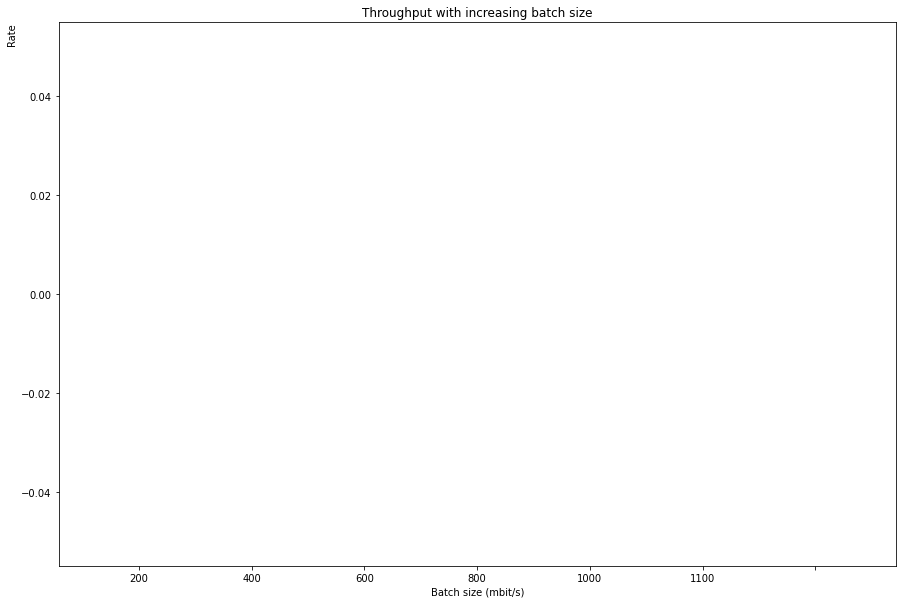

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))
# ax.axis(ymin=0.0, ymax=0.01)
for i, (bs, hsh) in enumerate(zip(batch_sizes, ["", "++", "///", ".", "o", "x", "\\"])):
    p = s3_both[(s3_both["pf"]==2) & (s3_both["batch_size"]==bs)]
    ax.bar(x=i-0.25, height=p["a_rate"], width=0.25, color="blue", hatch=hsh)
    ax.bar(x=i, height=p["t_rate"], width=0.25, color="red", hatch=hsh)
    ax.bar(x=i+0.25, height=p["v_rate"], width=0.25, color="green", hatch=hsh)

    p = s3_both[(s3_both["pf"]==4) & (s3_both["batch_size"]==bs)]
    ax.bar(x=i+4-0.25, height=p["a_rate"], width=0.25, color="blue", hatch=hsh)
    ax.bar(x=i+4, height=p["t_rate"], width=0.25, color="red", hatch=hsh)
    ax.bar(x=i+4+0.25, height=p["v_rate"], width=0.25, color="green", hatch=hsh)

ax.set_xlabel("Batch size (mbit/s)", loc="center")
ax.set_xticklabels([0]+batch_sizes, fontdict=None)
ax.set_ylabel("Rate", loc="top")
ax.set_title(f"Throughput with increasing batch size", loc='center')

/tmp/ipykernel_9761/4074255580.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+list(batch_sizes), fontdict=None)


Text(0.5, 1.0, 'GPU utilization vs batch size: blue = asyncio, red = threaded, green = vanilla')

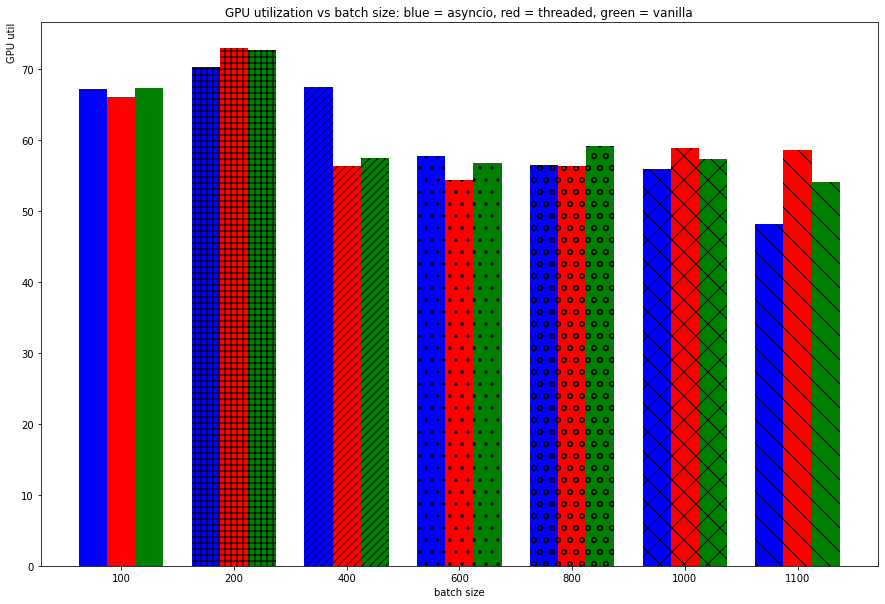

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))
# ax.axis(ymin=0.0, ymax=0.01)
for i, (bs, hsh) in enumerate(zip(batch_sizes, ["", "++", "///", ".", "o", "x", "\\"])):
    p = s3_both[(s3_both["pf"]==2) & (s3_both["batch_size"]==bs)]
    ax.bar(x=i-0.25, height=p["a_gpu"], width=0.25, color="blue", hatch=hsh)
    ax.bar(x=i, height=p["t_gpu"], width=0.25, color="red", hatch=hsh)
    ax.bar(x=i+0.25, height=p["v_gpu"], width=0.25, color="green", hatch=hsh)

    p = s3_both[(s3_both["pf"]==4) & (s3_both["batch_size"]==bs)]
    ax.bar(x=i+4-0.25, height=p["a_gpu"], width=0.25, color="blue", hatch=hsh)
    ax.bar(x=i+4, height=p["t_gpu"], width=0.25, color="red", hatch=hsh)
    ax.bar(x=i+4+0.25, height=p["v_gpu"], width=0.25, color="green", hatch=hsh)

ax.set_xlabel("batch size", loc="center")
ax.set_xticklabels([0]+list(batch_sizes), fontdict=None)
ax.set_ylabel("GPU util", loc="top")
ax.set_title(f"GPU utilization vs batch size: blue = asyncio, red = threaded, green = vanilla", loc='center')


120000
Lines num: 120025


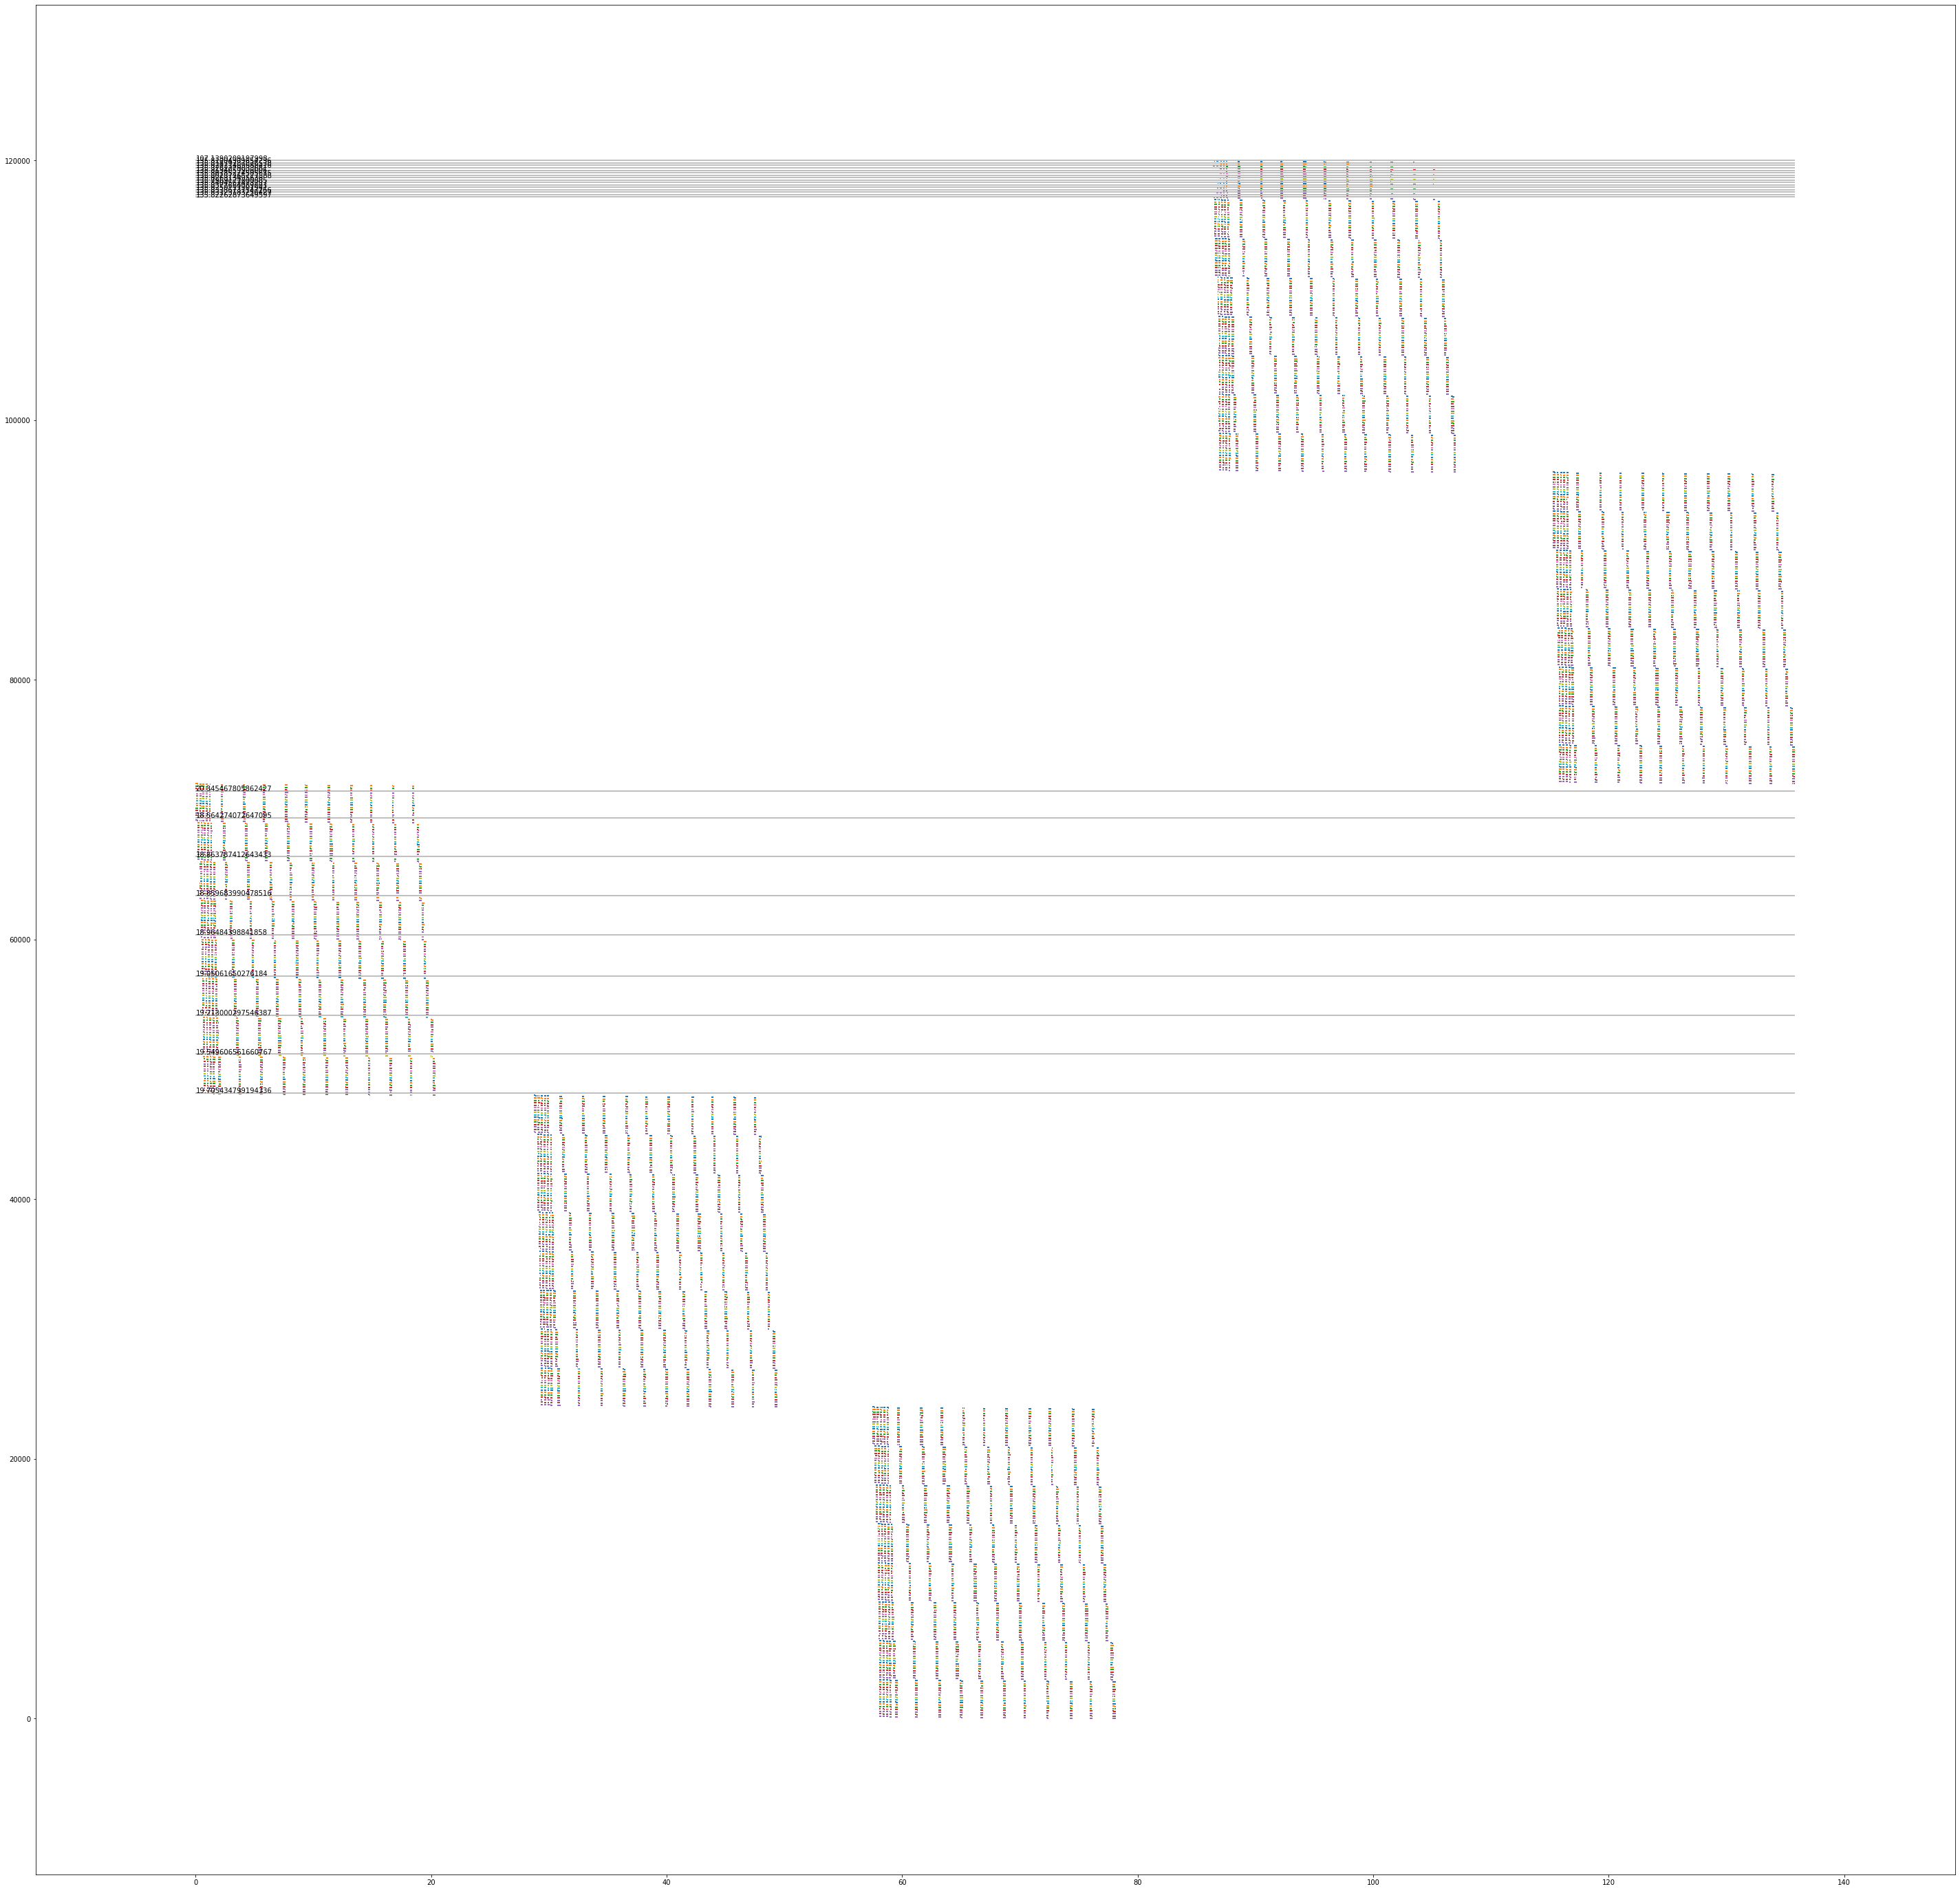

In [24]:
run = df_dataloader_async[(df_dataloader_async["num_workers"]==8) & 
                          (df_dataloader_async["batch_size"]==100)]["run"].iloc[0]
len(run)
plot_events_timeline_detailed(df_dataloader_async[df_dataloader_async["run"]==run], 
                              filter_function="__getitem__")


120000
Lines num: 120038


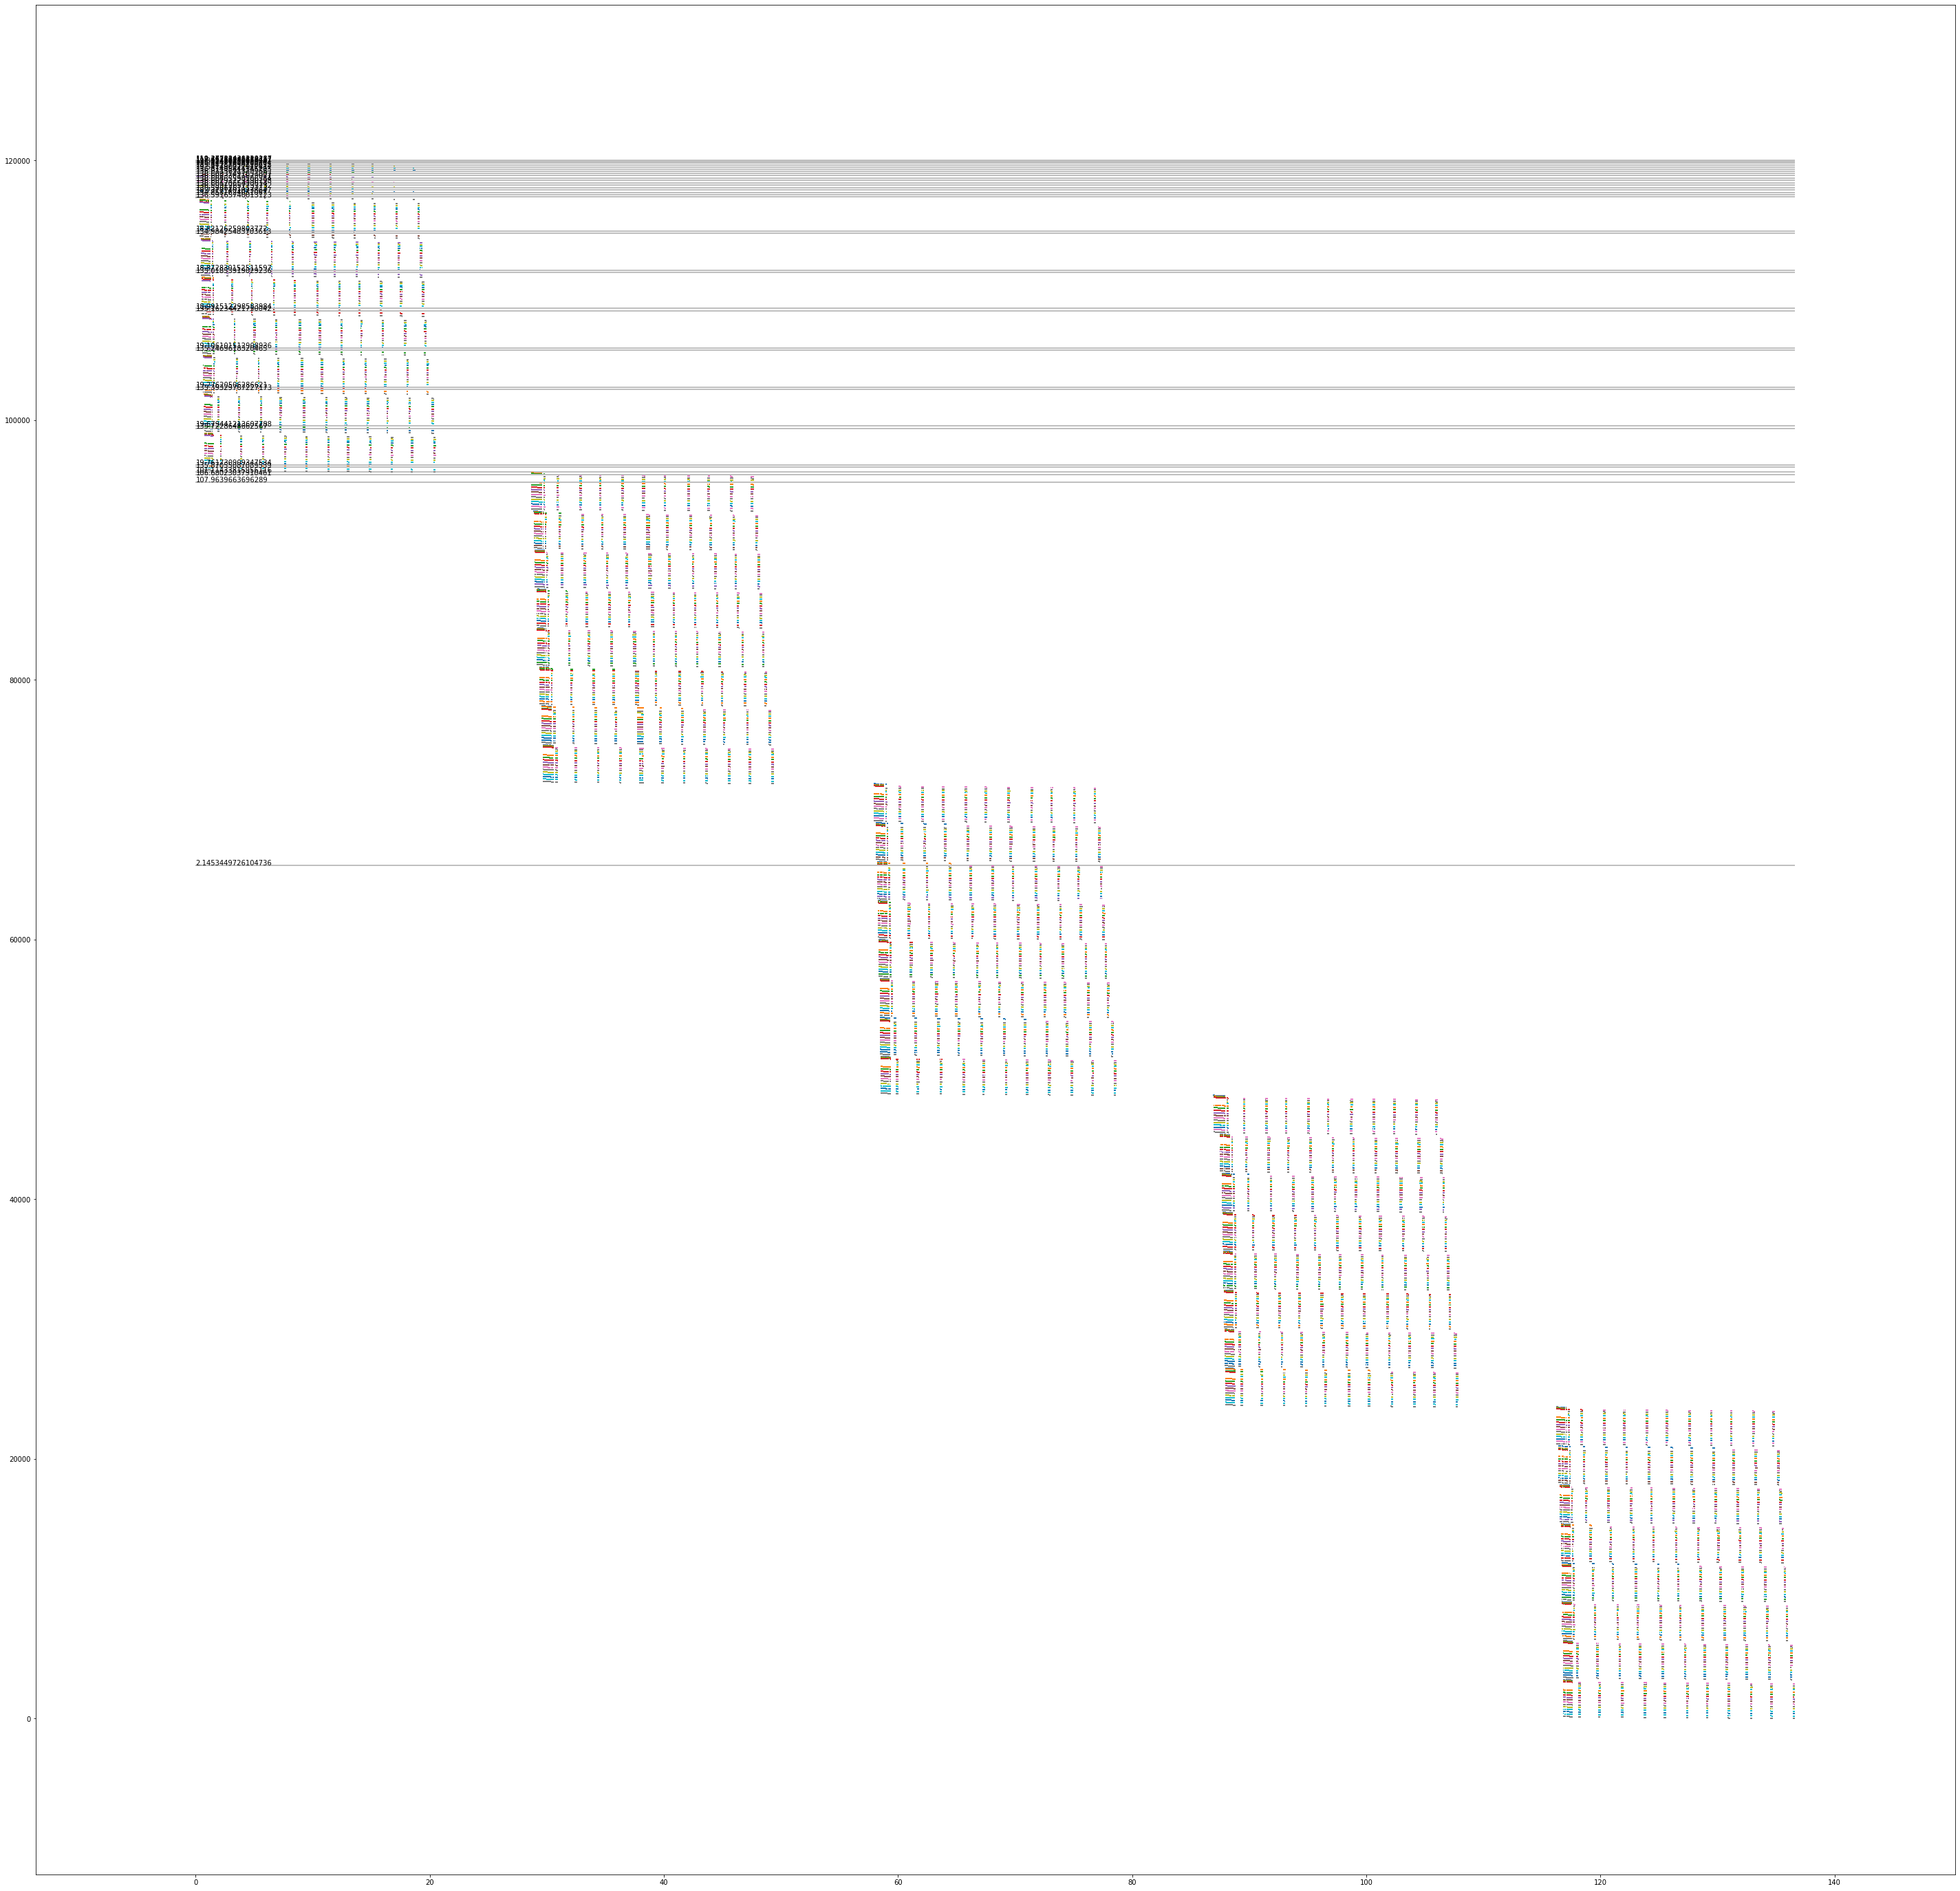

In [25]:
run = df_dataloader_threaded[(df_dataloader_threaded["num_workers"]==8) & 
                             (df_dataloader_threaded["batch_size"]==100)]["run"].iloc[0]
len(run)
plot_events_timeline_detailed(df_dataloader_threaded[df_dataloader_threaded["run"]==run], 
                              filter_function="__getitem__")


120000
Lines num: 120001


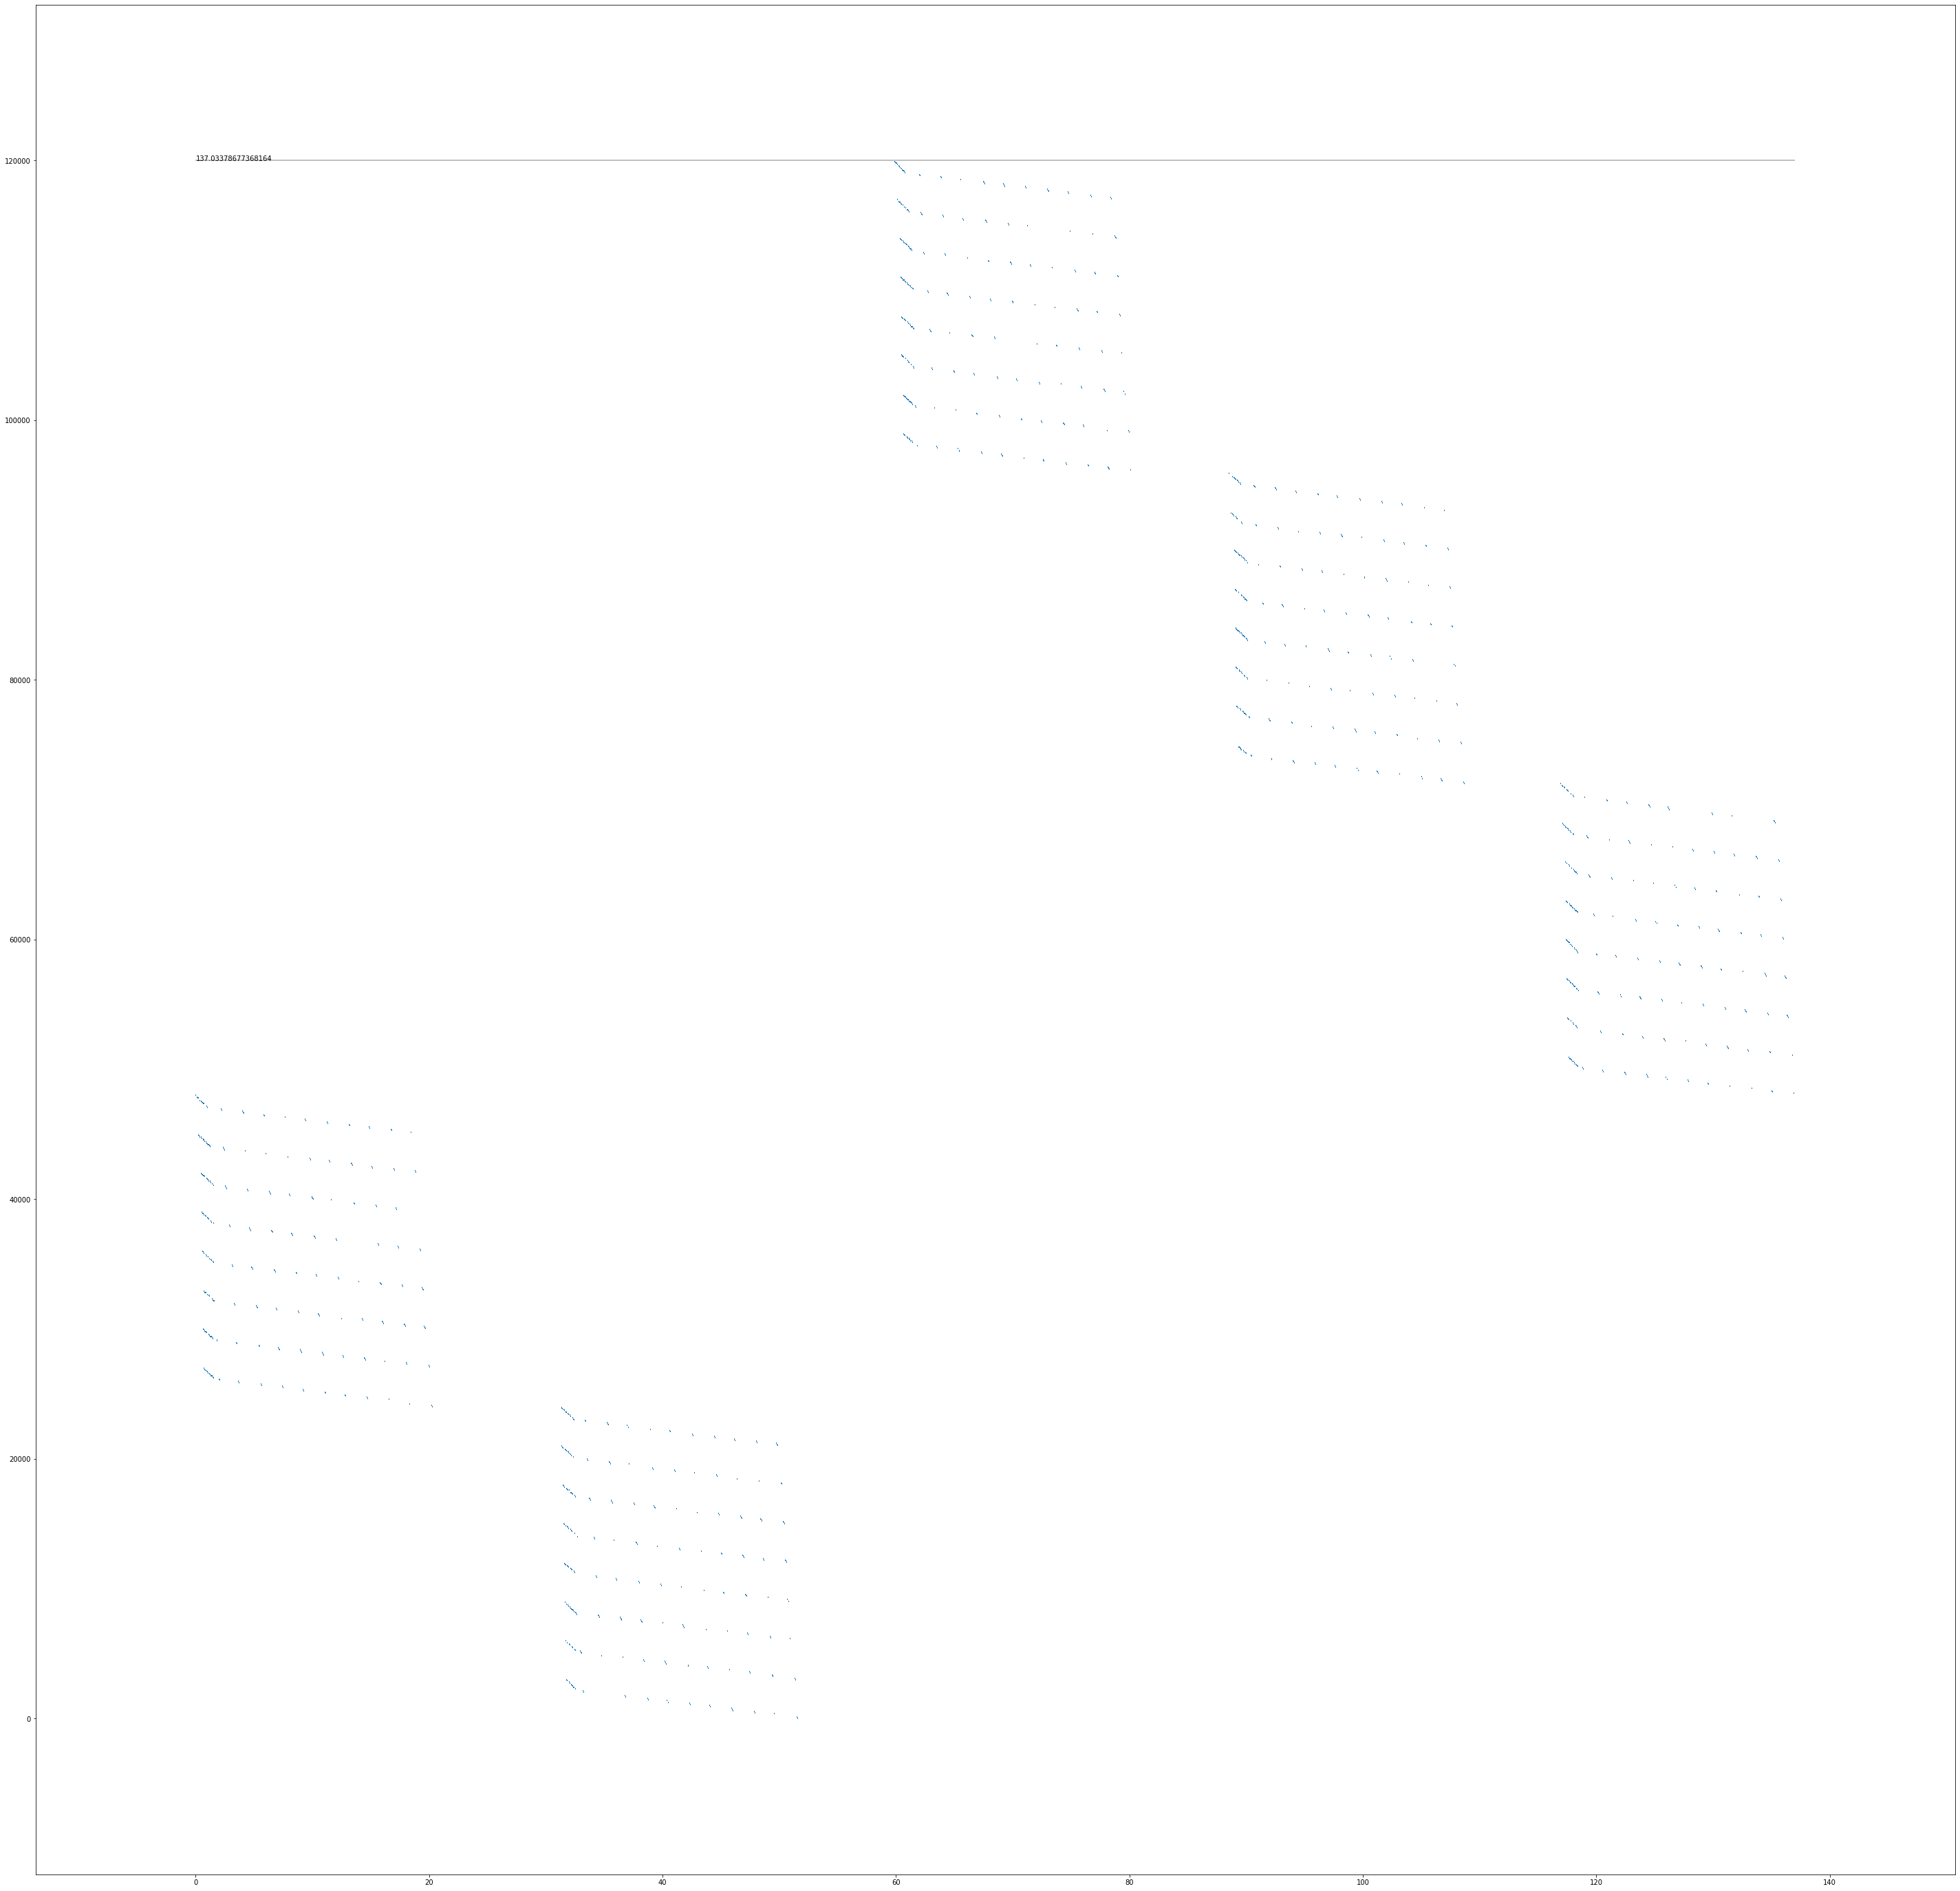

In [26]:
run = df_dataloader_vanilla[(df_dataloader_vanilla["num_workers"]==8) & 
                             (df_dataloader_vanilla["batch_size"]==100)]["run"].iloc[0]
len(run)
plot_events_timeline_detailed(df_dataloader_vanilla[df_dataloader_vanilla["run"]==run], 
                              filter_function="__getitem__")


### RATE

In [46]:
s3_both

batch_size num_fetch_workers num_workers a_rate      a_gpu   pf t_rate  \
0        100              [16]         [8]      0  67.204167  4.0      0   
1        200              [16]         [8]      0  70.225000  4.0      0   
2        400              [16]         [8]      0  67.483333  4.0      0   
3        600              [16]         [8]      0  57.800000  4.0      0   
4        800              [16]         [8]      0  56.466667  4.0      0   
5       1000              [16]         [8]      0  55.916667  4.0      0   
6       1100              [16]         [8]      0  48.136364  4.0      0   

       t_gpu v_rate      v_gpu  
0  66.025000      0  67.312500  
1  72.941667      0  72.708333  
2  56.333333      0  57.516667  
3  54.425000      0  56.725000  
4  56.300000      0  59.133333  
5  58.916667      0  57.291667  
6  58.636364      0  54.090909

In [47]:
def plot_stats(d1):   
    fig, ax = plt.subplots(figsize=(15, 10))
#     ax.axis(ymin=100, ymax=345)
    for i, (batch_size, color) in enumerate(zip(batch_sizes, 
                                                ["red", "gray", "lime", "aqua", "yellow", "green", "gold"])):
        current_batch = d1[d1["batch_size"]==batch_size]
        current_batch = current_batch.sort_values(["batch_size"], ascending=True)
        xrange = 0
        ax.bar(x=i+xrange, height=current_batch["a_rate"], width=0.25, color=color, label=f"A-rate, {batch_size}")
        ax.bar(x=i+xrange+0.3, height=current_batch["t_rate"], hatch="xxx", color=color, width=0.25, label=f"T-Rate, {batch_size}")
        ax.bar(x=i+xrange+0.6, height=current_batch["v_rate"], hatch="...", color=color, width=0.25, label=f"V-Rate, {batch_size}")
        
    ax.grid(linestyle='--', which="both")
    ax.set_xticklabels([0] + batch_sizes, fontdict=None)

    del current_batch
    ax.set_xlabel(f"batch size", loc="center")
    ax.set_ylabel("Rate", loc="top")
    ax.set_title(f"S3 Asyncio vs. Threaded vs. Vanilla Pytorch + Batch sizes", loc='center')
    ax.legend()


/tmp/ipykernel_9761/911586854.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0] + batch_sizes, fontdict=None)


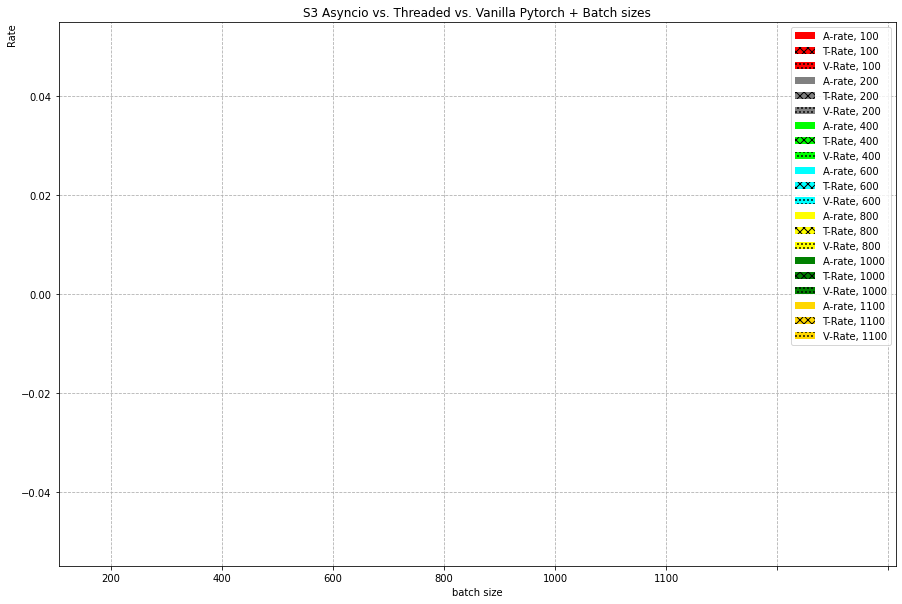

In [48]:
plot_stats(s3_both)

!!! **Vannila is good with many workers and small batches!**

In [49]:
#f_df_dataloader_s3_async=df_dataloader_s3_async[df_dataloader_s3_async["function_name"]=="__getitem__"]
#f_df_dataloader_s3_threaded=df_dataloader_s3_threaded[df_dataloader_s3_threaded["function_name"]=="__getitem__"]
#f_df_dataloader_s3_vanilla=df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["function_name"]=="__getitem__"]

In [50]:
print(np.unique(df_dataloader_s3_async["function_name"].to_numpy()))

['__getitem__' '_worker_loop' 'advance' 'batch_to_device' 'fetch'
 'start_train']


In [51]:
df_dataloader_s3_async["prefetch_factor"]

0         4
1         4
2         4
3         4
4         4
         ..
845922    4
845923    4
845924    4
845925    4
845926    4
Name: prefetch_factor, Length: 845927, dtype: int64

In [52]:
%%javascript
    IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [53]:
# fn = "__getitem__"
def plot_stats(fn, show_mean=False, ymax=None):
#     fig, ax = plt.subplots(figsize=(15, 10))
#     ax.axis(ymin=100, ymax=345)
    for bs in batch_sizes:
        skip_time = 10
        f_df_dataloader_s3_async=df_dataloader_s3_async[df_dataloader_s3_async["function_name"]==fn]
        f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["batch_size"]==bs]
        f_df_dataloader_s3_async=f_df_dataloader_s3_async.sort_values(["num_workers"], ascending=False)

        f_df_dataloader_s3_threaded=df_dataloader_s3_threaded[df_dataloader_s3_threaded["function_name"]==fn]
        f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded[f_df_dataloader_s3_threaded["batch_size"]==bs]
        f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded.sort_values(["num_workers"], ascending=False)

        f_df_dataloader_s3_vanilla=df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["function_name"]==fn]
        f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla[f_df_dataloader_s3_vanilla["batch_size"]==bs]
        f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla.sort_values(["num_workers"], ascending=False)
    
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.plot(range(len(f_df_dataloader_s3_async)), f_df_dataloader_s3_async["elapsed"],color="red",label="async")
        ax.plot(range(len(f_df_dataloader_s3_threaded)), f_df_dataloader_s3_threaded["elapsed"],color="blue",label="threaded")
        ax.plot(range(len(f_df_dataloader_s3_vanilla)), f_df_dataloader_s3_vanilla["elapsed"],color="green",label="vanilla")
    
        
        if show_mean:
            ax.axhline(y=f_df_dataloader_s3_async["elapsed"].mean(),color="red", linestyle="--",label="async mean")
            ax.axhline(y=f_df_dataloader_s3_threaded["elapsed"].mean(),color="blue", linestyle="--",label="threaded mean")
            ax.axhline(y=f_df_dataloader_s3_vanilla["elapsed"].mean(),color="green", linestyle="--",label="vanilla mean")
        
        del f_df_dataloader_s3_vanilla
        del f_df_dataloader_s3_threaded
        del f_df_dataloader_s3_async
        ax.set_xlabel(f"Experiment", loc="center")
        ax.set_ylabel("Duration (s)", loc="top")
        ax.set_title(f"{fn}, {bs}", loc='center')
        ax.legend()

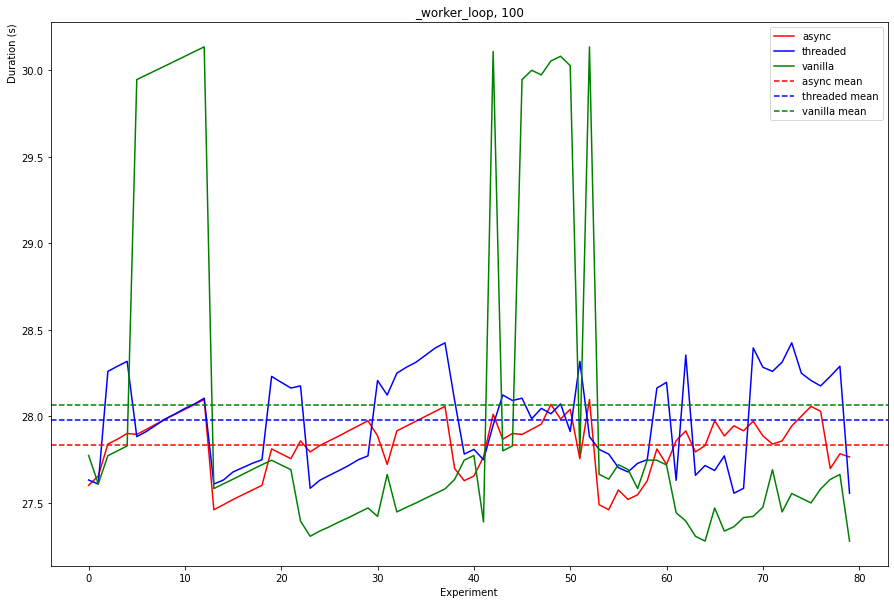

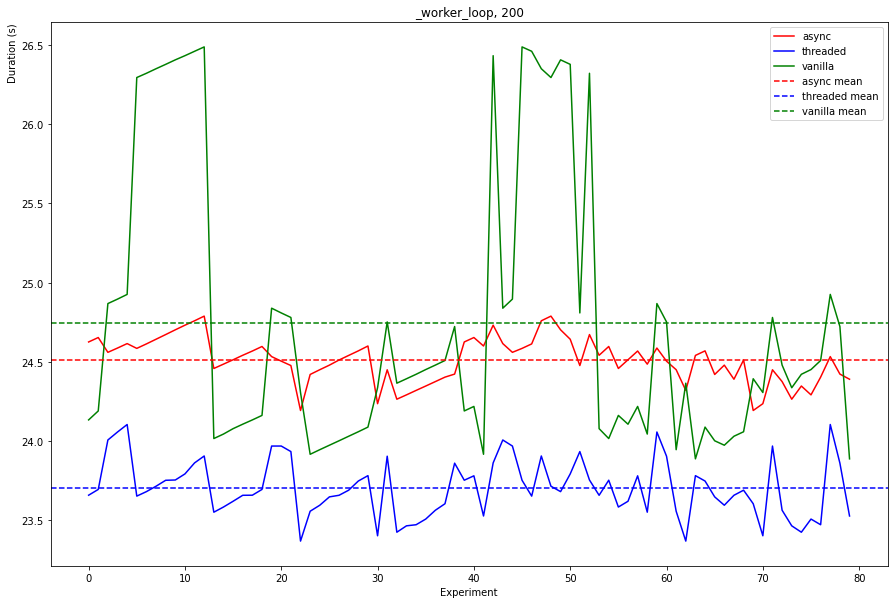

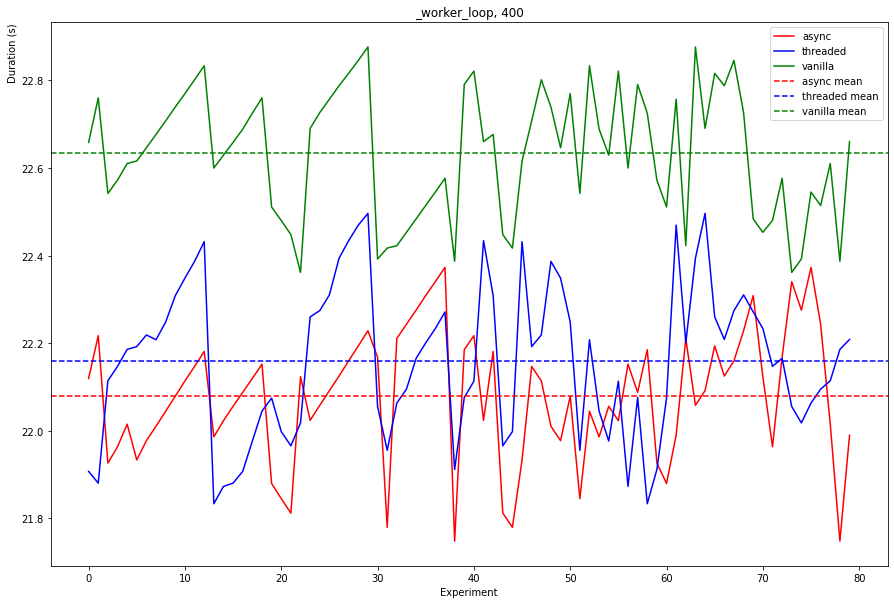

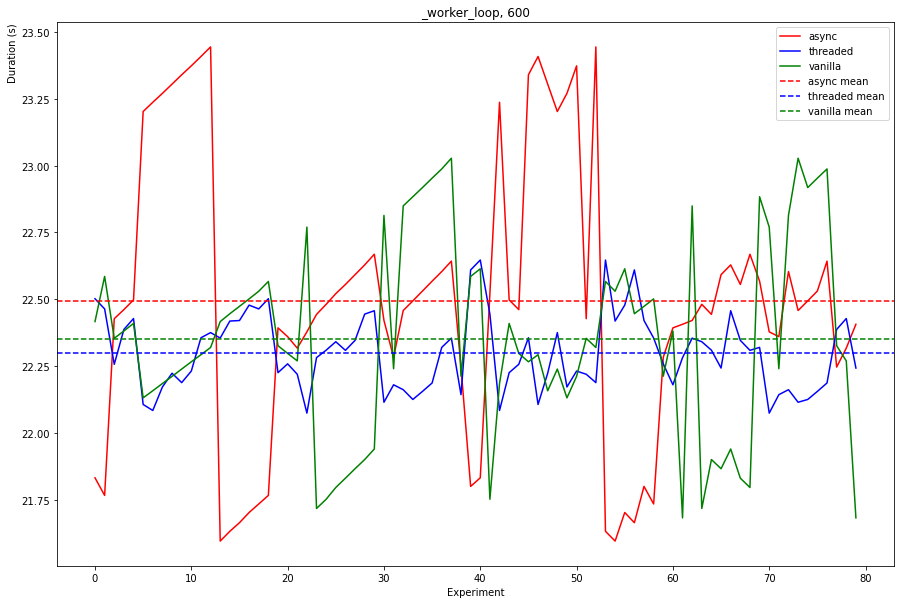

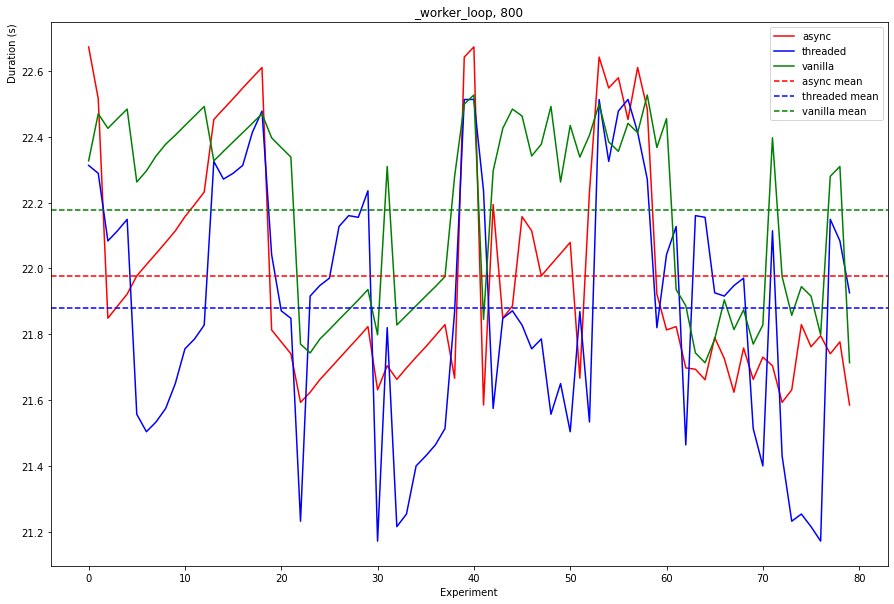

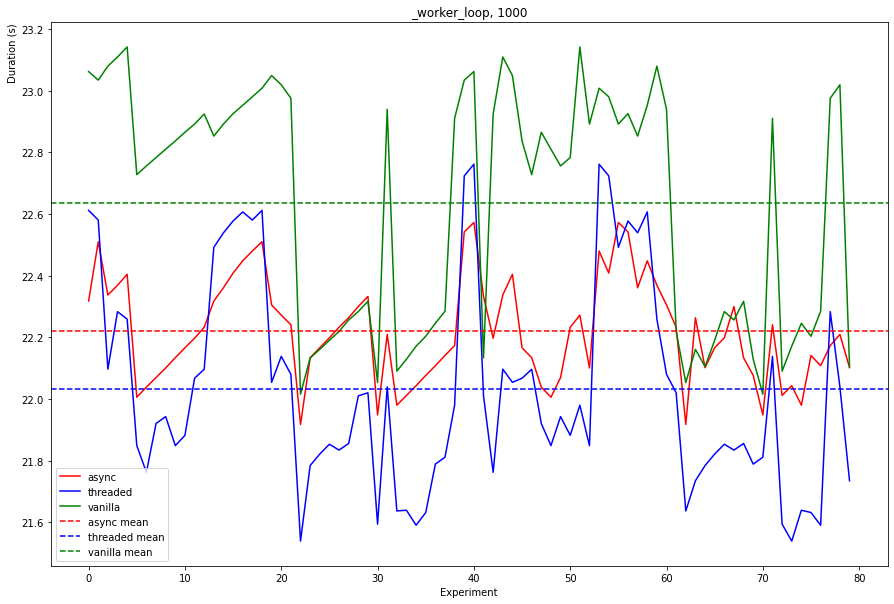

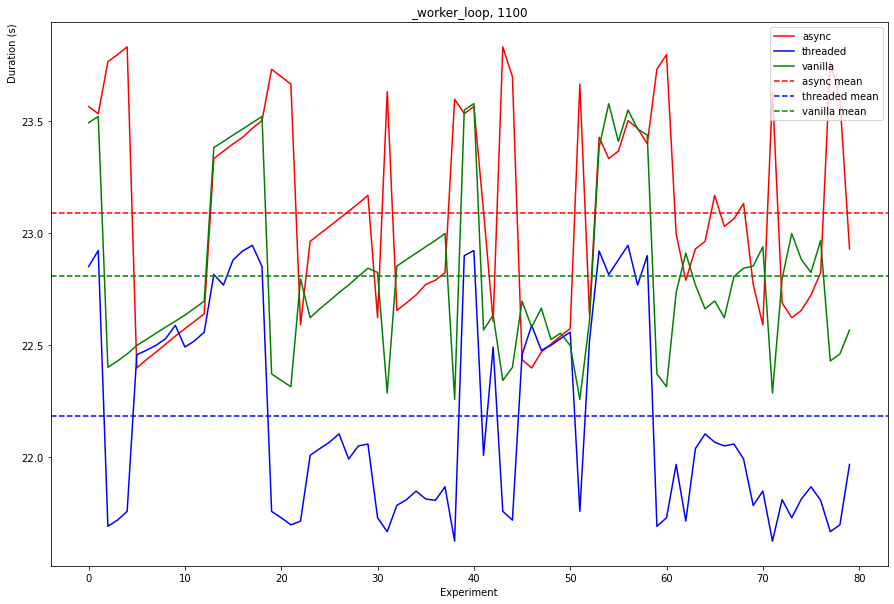

In [54]:
plot_stats("_worker_loop", True)

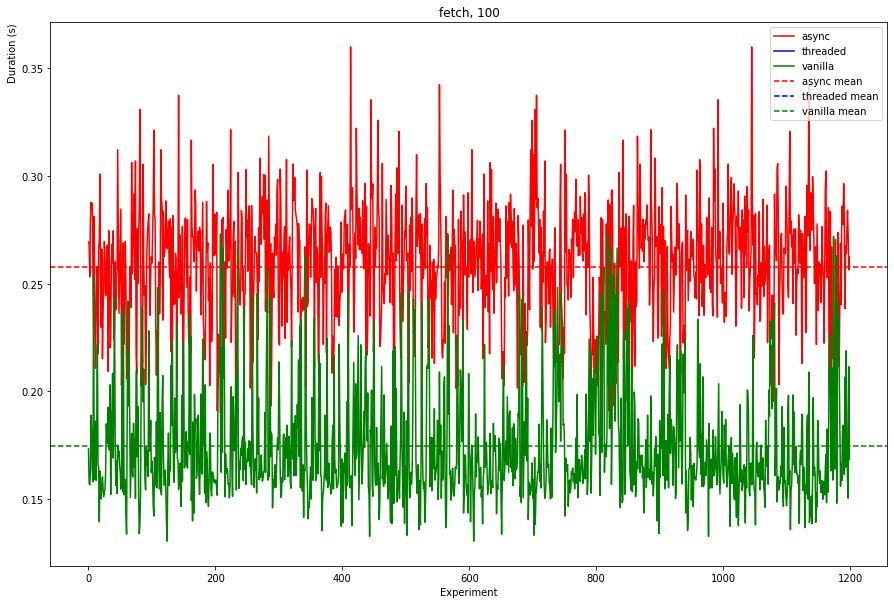

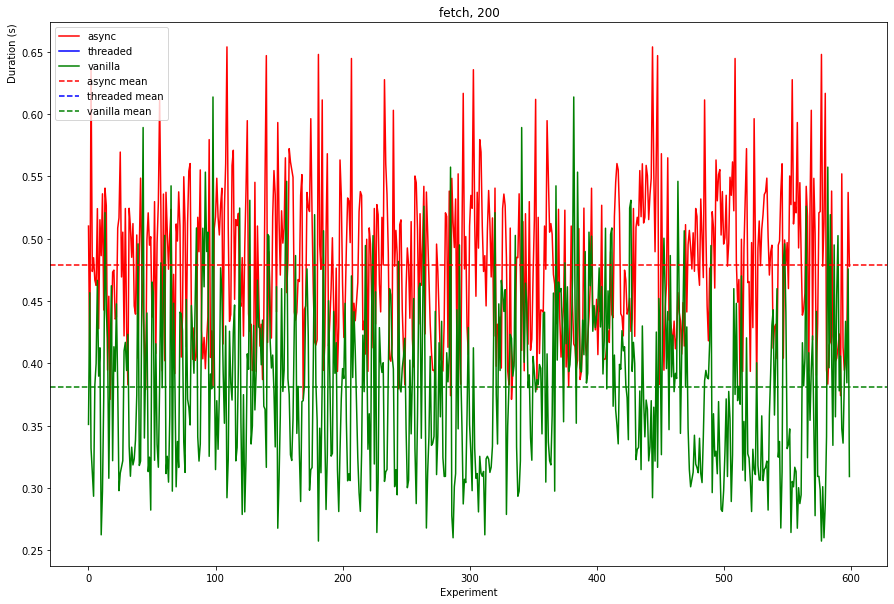

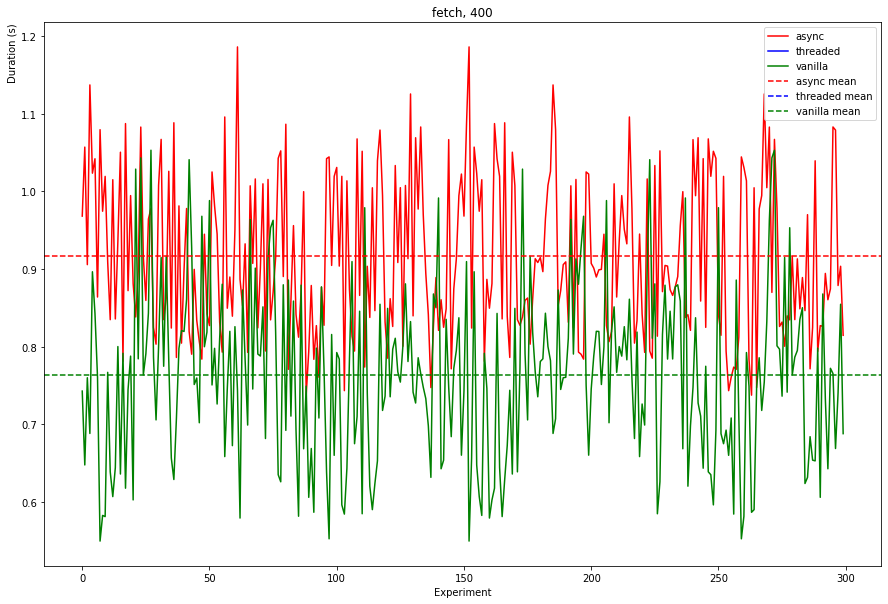

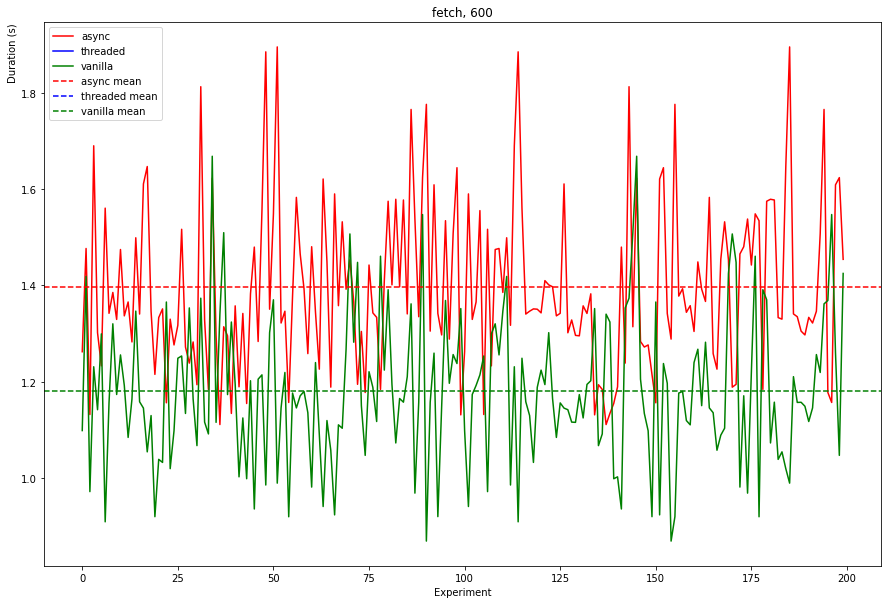

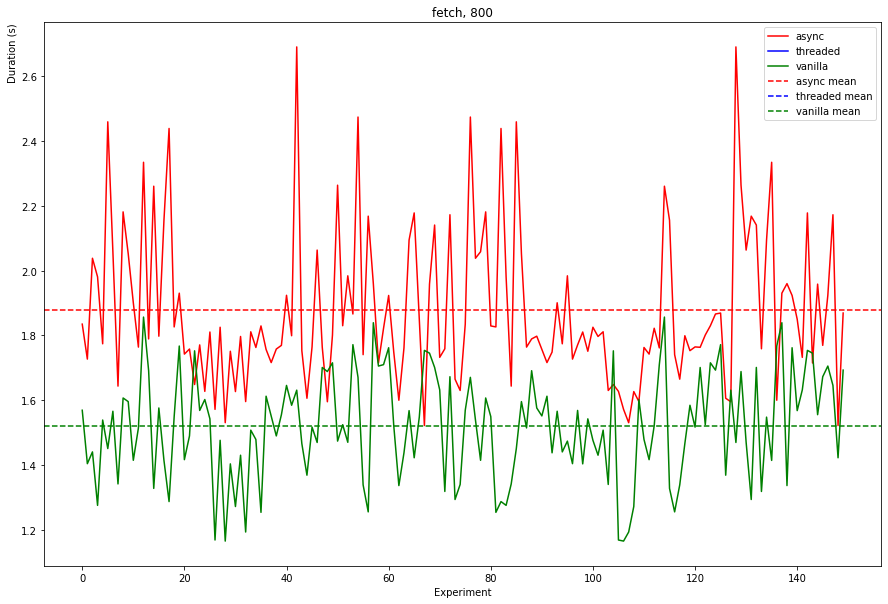

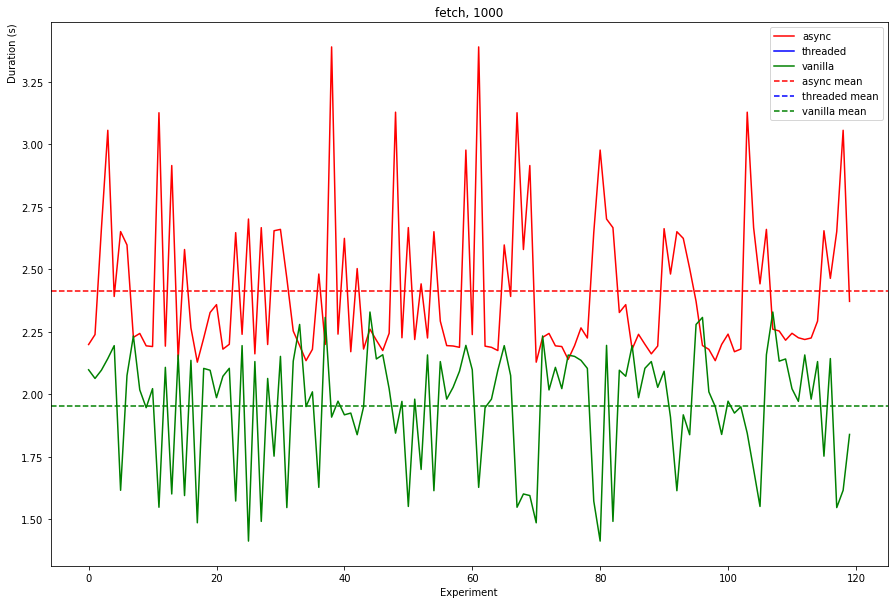

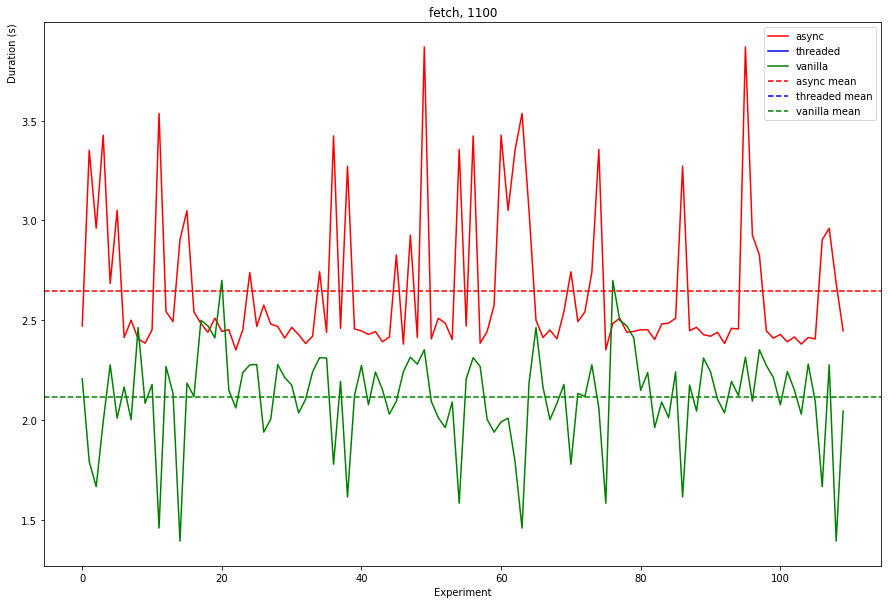

In [55]:
plot_stats("fetch", True)

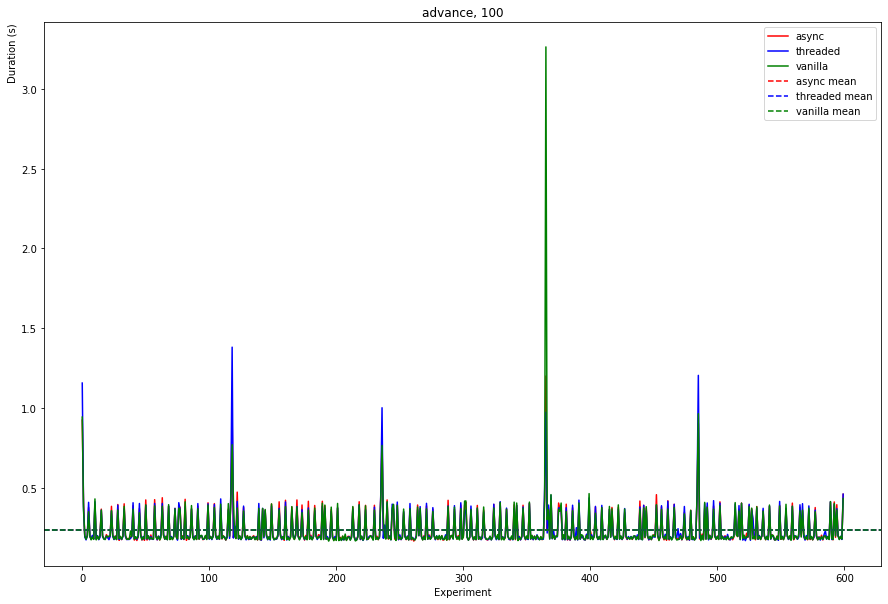

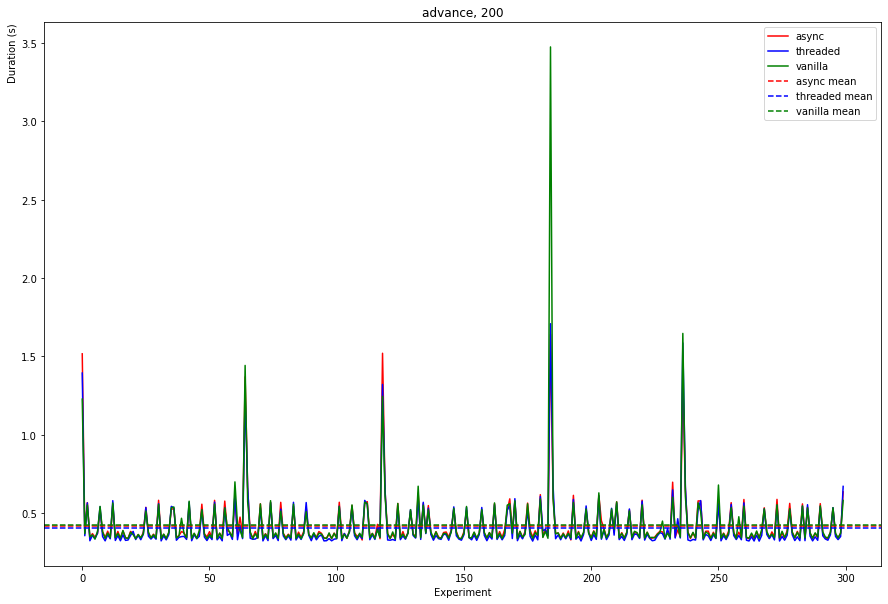

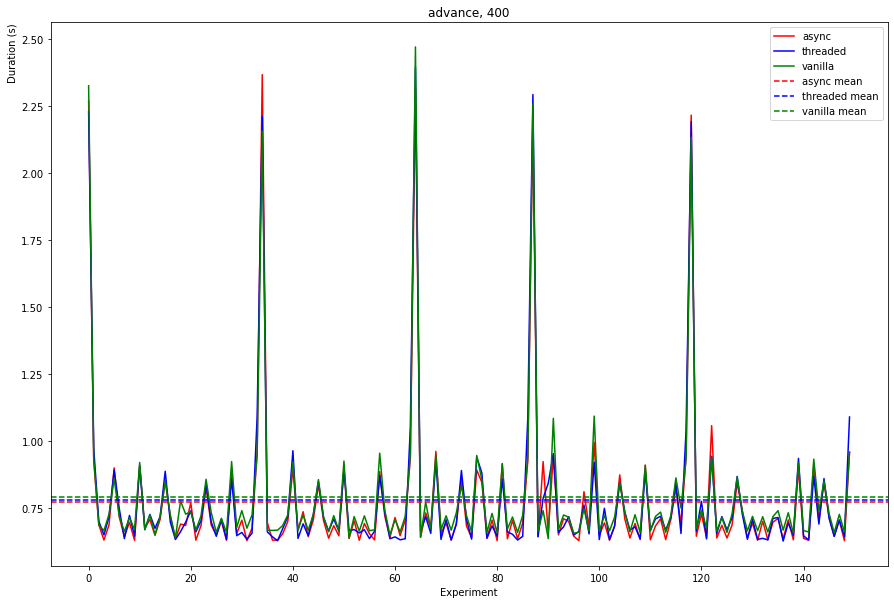

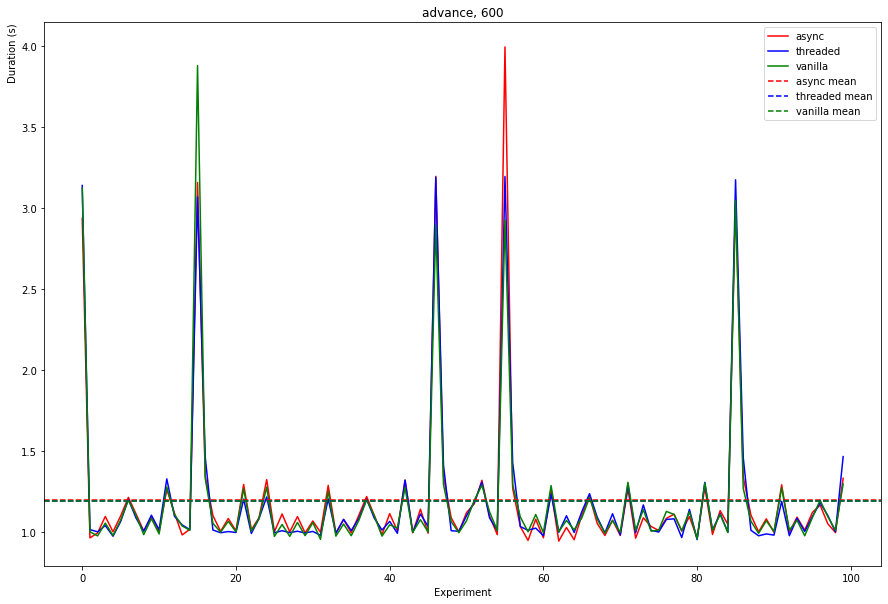

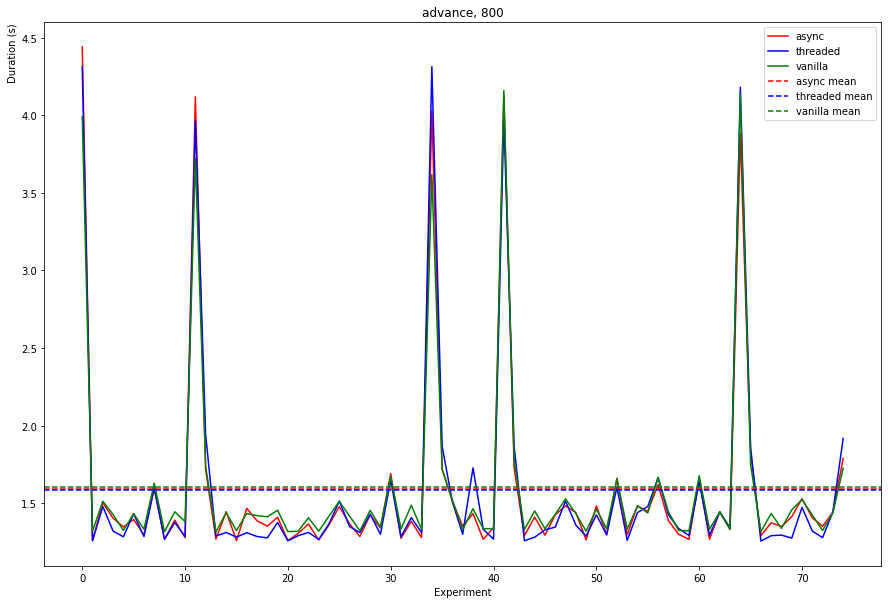

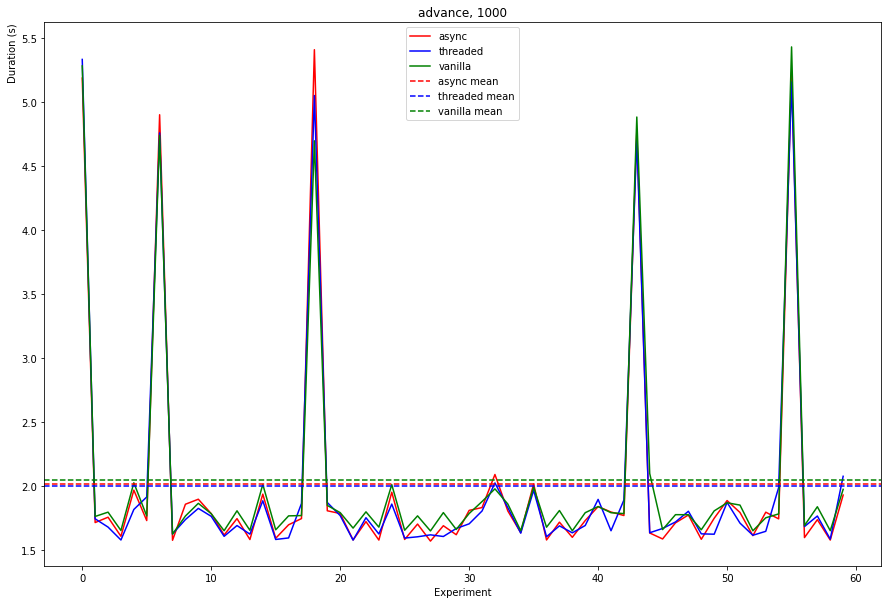

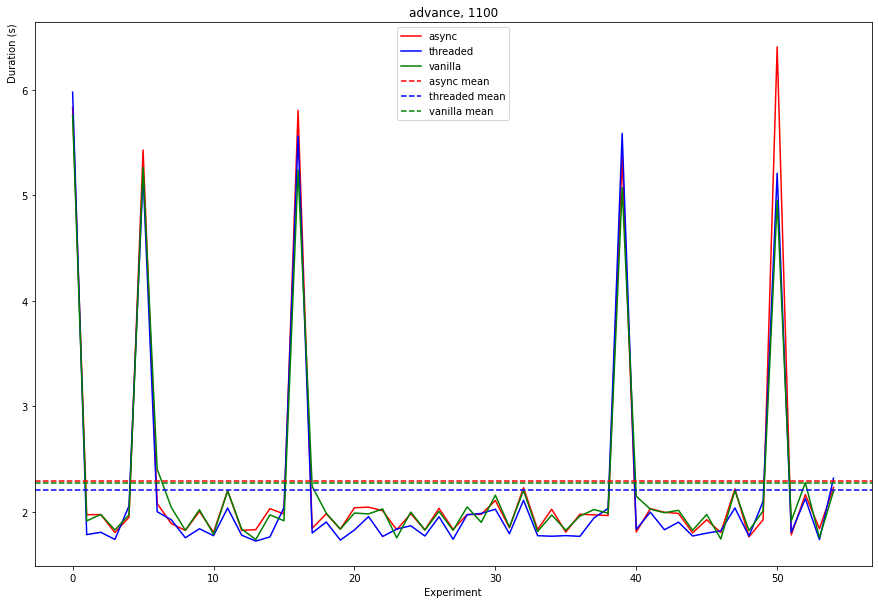

In [56]:
plot_stats("advance", True)

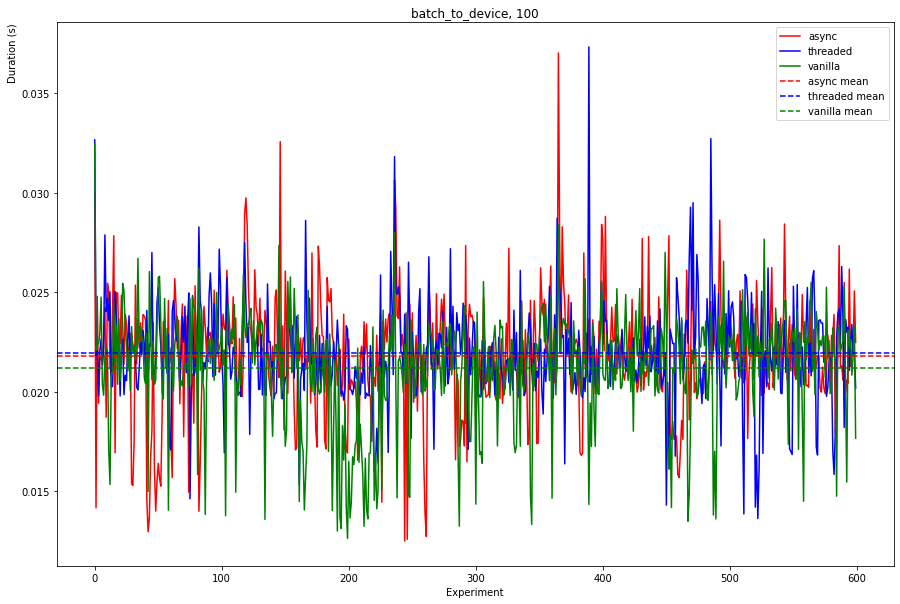

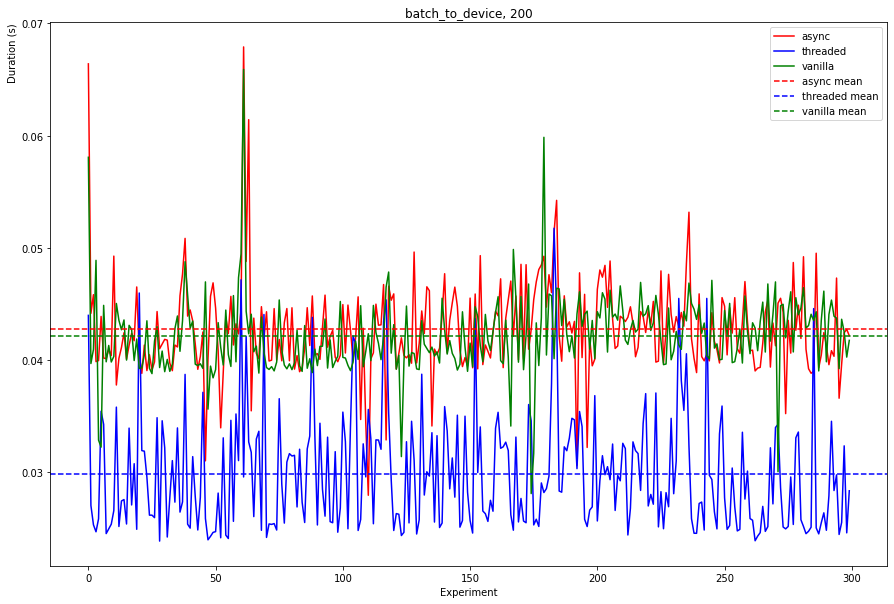

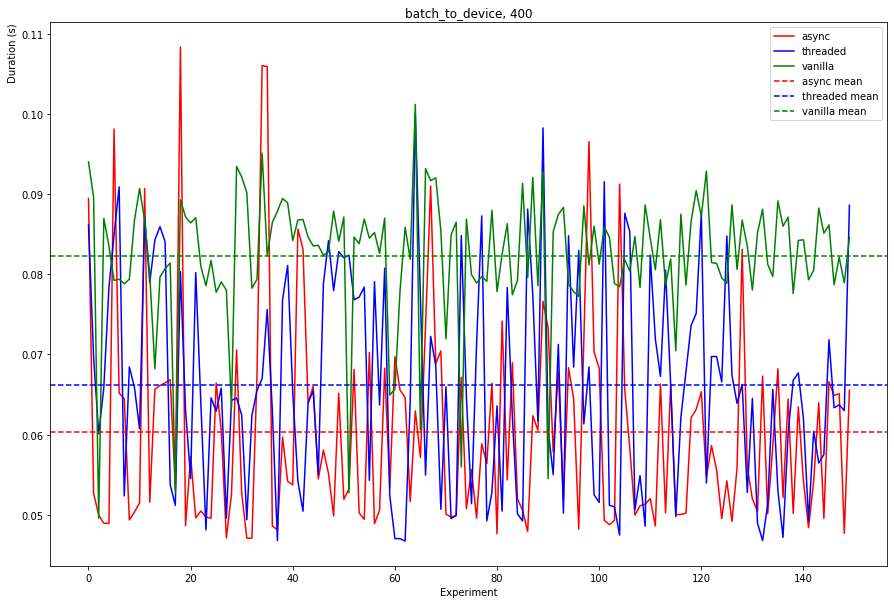

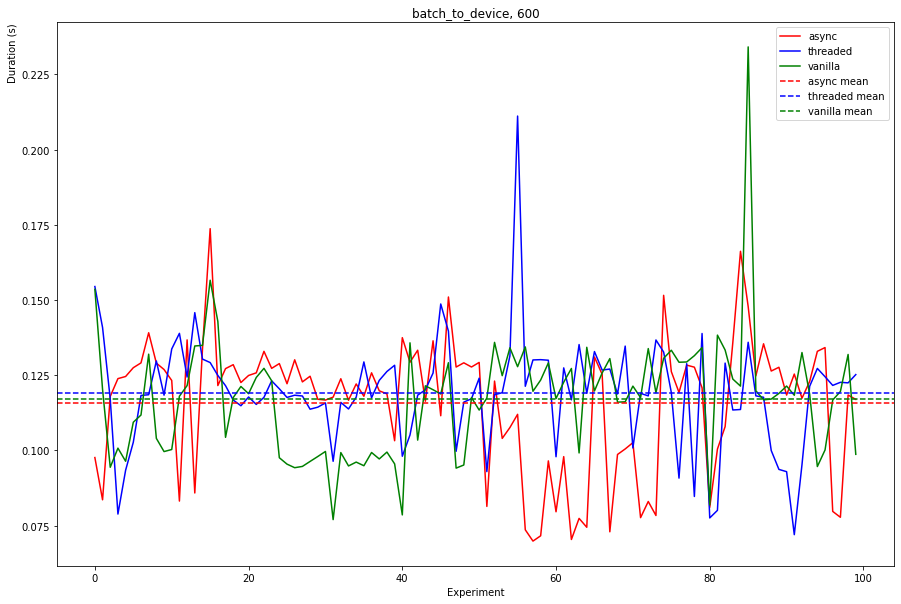

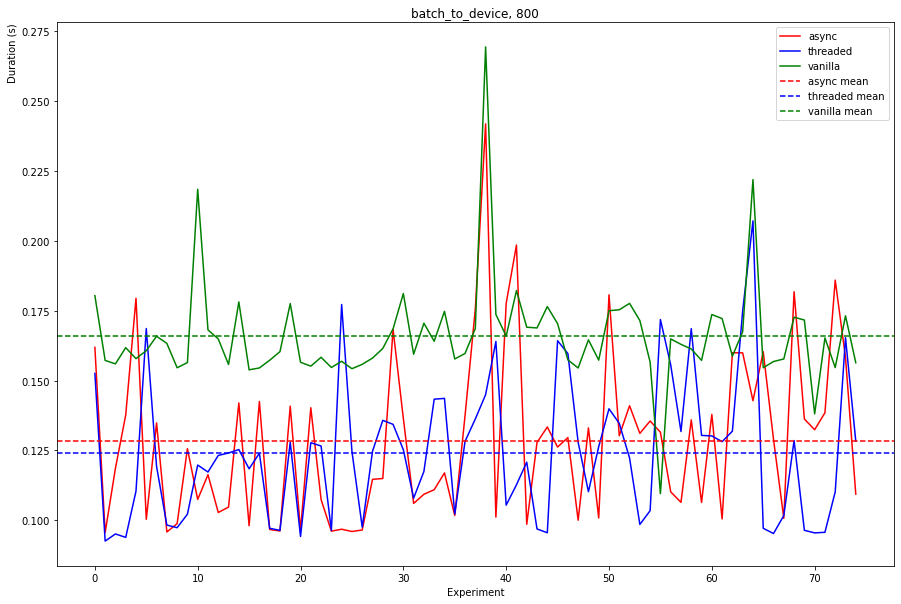

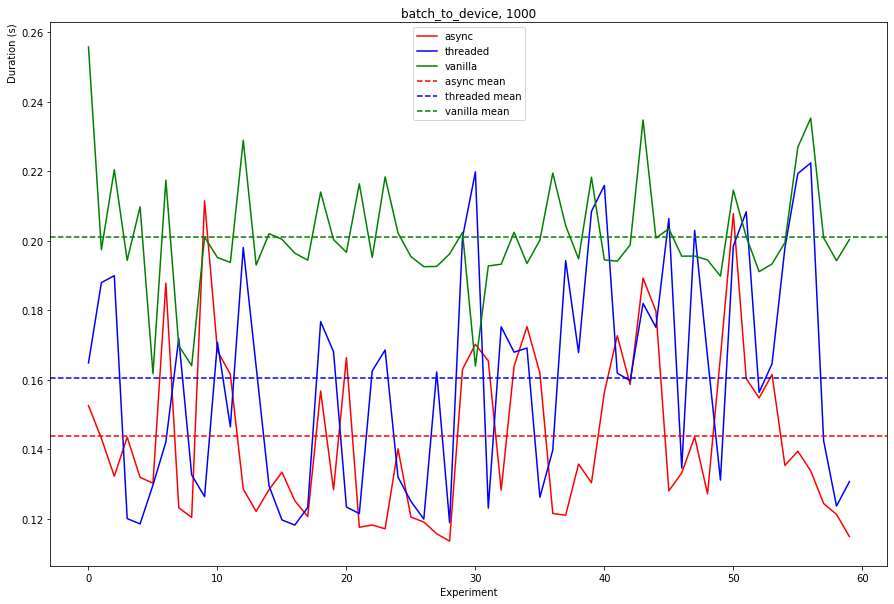

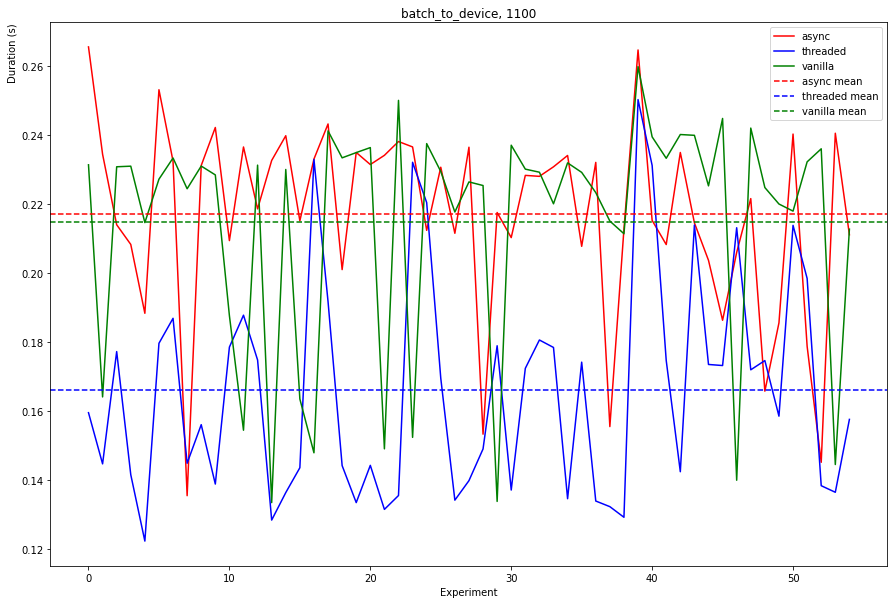

In [57]:
plot_stats("batch_to_device", True)

### GPU Utilization

In [58]:
def plot_gpu_stats(d1):   
#     ax.axis(ymin=0.003, ymax=0.012)
    fig, ax = plt.subplots(figsize=(15, 10))
    for i, (batch_size, color) in enumerate(zip(batch_sizes, 
                                                ["red", "gray", "lime", "aqua", "yellow", "green", "gold"])):
        s3_fix_1 = d1[d1["batch_size"]==batch_size]
        ax.bar(x=i, height=s3_fix_1["a_gpu"], width=0.25, color=color, label=f"A-util, {batch_size}")
        ax.bar(x=i+0.3, height=s3_fix_1["t_gpu"], hatch="xxx", color=color, width=0.25, label=f"T-util, {batch_size}")
        ax.bar(x=i+0.6, height=s3_fix_1["v_gpu"], hatch="...", color=color, width=0.25, label=f"V-util, {batch_size}")

    ax.grid(linestyle='--', which="both")
    ax.set_xlabel(f"Batch sizes", loc="center")
    ax.set_ylabel("GPU Util", loc="top")
    ax.set_xticklabels([0]+list(batch_sizes), fontdict=None)
    ax.set_title(f"", loc='center')

/tmp/ipykernel_9761/1691066276.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0]+list(batch_sizes), fontdict=None)


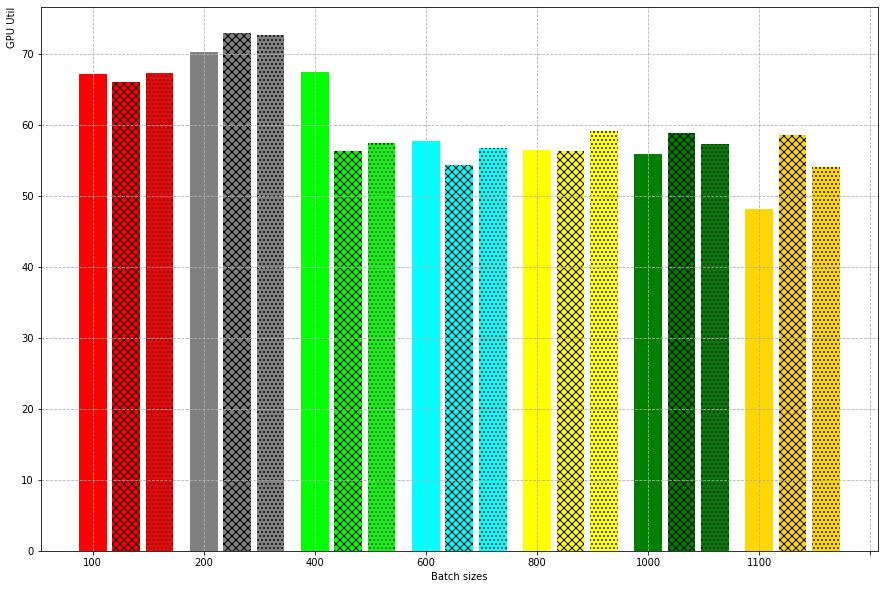

In [59]:
plot_gpu_stats(s3_both)

### Batch download - sum

In [60]:
df_s3_gpu_util

run  \
0    20211018f151715_benchmark_e2e_s3_100_8_16_sync   
1    20211018f151952_benchmark_e2e_s3_200_8_16_sync   
2    20211018f152211_benchmark_e2e_s3_400_8_16_sync   
3    20211018f152422_benchmark_e2e_s3_600_8_16_sync   
4    20211018f152634_benchmark_e2e_s3_800_8_16_sync   
5   20211018f152847_benchmark_e2e_s3_1000_8_16_sync   
6   20211018f153103_benchmark_e2e_s3_1100_8_16_sync   
7    20211018f153320_benchmark_e2e_s3_100_8_16_sync   
8    20211018f153555_benchmark_e2e_s3_200_8_16_sync   
9    20211018f153809_benchmark_e2e_s3_400_8_16_sync   
10   20211018f154018_benchmark_e2e_s3_600_8_16_sync   
11   20211018f154230_benchmark_e2e_s3_800_8_16_sync   
12  20211018f154441_benchmark_e2e_s3_1000_8_16_sync   
13  20211018f154654_benchmark_e2e_s3_1100_8_16_sync   
14   20211018f154908_benchmark_e2e_s3_100_8_16_sync   
15   20211018f155142_benchmark_e2e_s3_200_8_16_sync   
16   20211018f155401_benchmark_e2e_s3_400_8_16_sync   
17   20211018f155609_benchmark_e2e_s3_600_8_16_sync   
18   20211018f155822_benchmark_e2e_s3_800_8_16_sync   
19  20211018f160034_benchmark_e2e_s3_1000_8_16_sync   
20  20211018f160248_benchmark_e2e_s3_1100_8_16_sync   

                                                  gpu   gpu_mean  gpu_median  \
0   [4.0, 75.0, 76.0, 81.0, 81.0, 48.0, 60.0, 51.0...  67.312500        70.0   
1   [8.0, 86.0, 100.0, 71.0, 82.0, 66.0, 83.0, 100...  72.708333        75.5   
2   [14.0, 100.0, 32.0, 69.0, 16.0, 66.0, 69.0, 10...  57.516667        61.0   
3   [22.0, 49.0, 22.0, 49.0, 16.0, 100.0, 22.0, 85...  56.725000        53.0   
4   [27.0, 60.0, 56.0, 90.0, 30.0, 100.0, 19.0, 90...  59.133333        54.5   
5   [26.0, 100.0, 34.0, 100.0, 31.0, 100.0, 31.0, ...  57.291667        39.0   
6   [23.0, 97.0, 28.0, 82.0, 30.0, 100.0, 30.0, 10...  54.090909        38.5   
7   [4.0, 89.0, 21.0, 90.0, 92.0, 84.0, 86.0, 39.0...  66.025000        69.0   
8   [64.0, 60.0, 65.0, 100.0, 14.0, 94.0, 92.0, 46...  72.941667        80.5   
9   [16.0, 51.0, 33.0, 60.0, 55.0, 100.0, 24.0, 73...  56.333333        52.5   
10  [17.0, 100.0, 21.0, 69.0, 14.0, 100.0, 19.0, 1...  54.425000        58.5   
11  [32.0, 100.0, 34.0, 35.0, 29.0, 64.0, 23.0, 10...  56.300000        38.0   
12  [39.0, 100.0, 19.0, 93.0, 37.0, 40.0, 40.0, 64...  58.916667        58.0   
13  [39.0, 100.0, 67.0, 100.0, 42.0, 100.0, 28.0, ...  58.636364        58.0   
14  [36.0, 76.0, 60.0, 63.0, 37.0, 81.0, 92.0, 61....  67.204167        69.0   
15  [31.0, 100.0, 72.0, 100.0, 38.0, 100.0, 63.0, ...  70.225000        76.5   
16  [16.0, 100.0, 76.0, 100.0, 16.0, 64.0, 98.0, 4...  67.483333        77.0   
17  [20.0, 100.0, 30.0, 73.0, 20.0, 100.0, 14.0, 9...  57.800000        58.0   
18  [32.0, 42.0, 27.0, 100.0, 20.0, 76.0, 28.0, 10...  56.466667        49.5   
19  [38.0, 100.0, 17.0, 69.0, 39.0, 100.0, 32.0, 1...  55.916667        49.5   
20  [31.0, 100.0, 24.0, 68.0, 36.0, 49.0, 14.0, 54...  48.136364        36.5   

          std  
0   18.715809  
1   26.445666  
2   32.500509  
3   33.691978  
4   32.301428  
5   32.052664  
6   29.609441  
7   21.176427  
8   28.844785  
9   32.813954  
10  32.943806  
11  33.279774  
12  27.404253  
13  26.903101  
14  19.724033  
15  28.608700  
16  31.629887  
17  37.210348  
18  31.757134  
19  26.372202  
20  27.442991

In [61]:
type(df_s3_gpu_util)

pandas.core.frame.DataFrame

In [62]:
# fn = "__getitem__"
def plot_stats2(fn, show_mean=False, ymax=None):
#     fig, ax = plt.subplots(figsize=(15, 10))
#     ax.axis(ymin=100, ymax=345)

    for bs in batch_sizes:
        all_async = []
        all_threaded = []
        all_vanilla = []
        for index, row in df_s3_gpu_util.iterrows():
            skip_time = 10
            f_df_dataloader_s3_async=df_dataloader_s3_async[df_dataloader_s3_async["run"]==row["run"]]
            mean_async = f_df_dataloader_s3_async["elapsed"].mean()
            f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["elapsed"]<=mean_async*1.2]
            f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["batch_size"]==bs]
            f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["function_name"]==fn]
            f_df_dataloader_s3_async=f_df_dataloader_s3_async.sort_values(["num_workers"], ascending=False)
            all_async += list(f_df_dataloader_s3_async["elapsed"])
            del f_df_dataloader_s3_async
            
            f_df_dataloader_s3_threaded=df_dataloader_s3_threaded[df_dataloader_s3_threaded["run"]==row["run"]]
            mean_threaded = f_df_dataloader_s3_threaded["elapsed"].mean()
            f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded[f_df_dataloader_s3_threaded["elapsed"]<=mean_threaded*1.2]
            f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded[f_df_dataloader_s3_threaded["batch_size"]==bs]
            f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded[f_df_dataloader_s3_threaded["function_name"]==fn]
            f_df_dataloader_s3_threaded=f_df_dataloader_s3_threaded.sort_values(["num_workers"], ascending=False)
            all_threaded += list(f_df_dataloader_s3_threaded["elapsed"])
            del f_df_dataloader_s3_threaded
            
            f_df_dataloader_s3_vanilla=df_dataloader_s3_vanilla[df_dataloader_s3_vanilla["run"]==row["run"]]
            mean_vanilla = f_df_dataloader_s3_vanilla["elapsed"].mean()
            f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla[f_df_dataloader_s3_vanilla["elapsed"]<=mean_vanilla*1.2]
            f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla[f_df_dataloader_s3_vanilla["batch_size"]==bs]
            f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla[f_df_dataloader_s3_vanilla["function_name"]==fn]
            f_df_dataloader_s3_vanilla=f_df_dataloader_s3_vanilla.sort_values(["num_workers"], ascending=False)
            all_vanilla += list(f_df_dataloader_s3_vanilla["elapsed"])
            del f_df_dataloader_s3_vanilla
        
        fig, ax = plt.subplots(figsize=(15, 10))
        ax.plot(range(len(all_async)), all_async, color="red",label="async")
        ax.plot(range(len(all_threaded)), all_threaded, color="blue",label="async")
        ax.plot(range(len(all_vanilla)), all_vanilla, color="green",label="async")
     
    del all_async
    del all_vanilla
    del mean_threaded
    ax.set_xlabel(f"Experiment", loc="center")
    ax.set_ylabel("Duration (s)", loc="top")
    ax.set_title(f"{fn}, {bs}", loc='center')
    ax.legend()

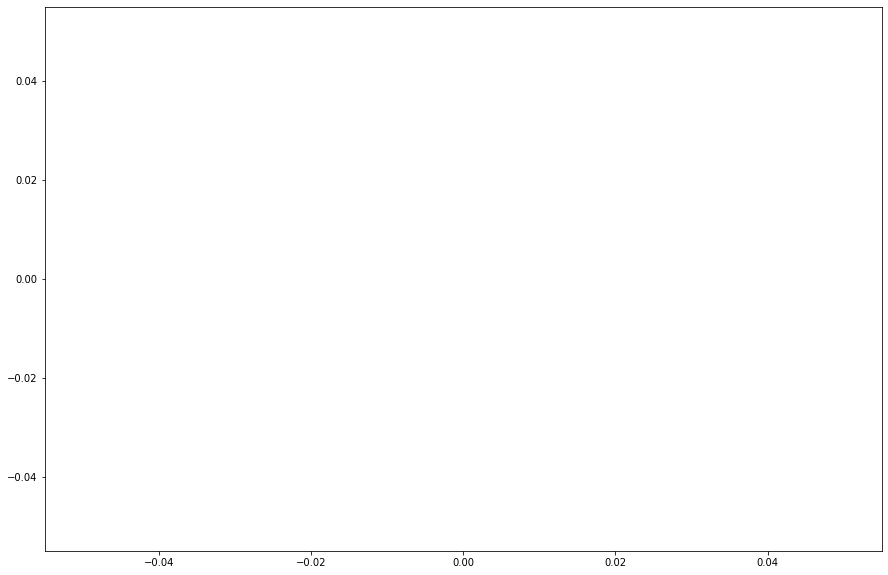

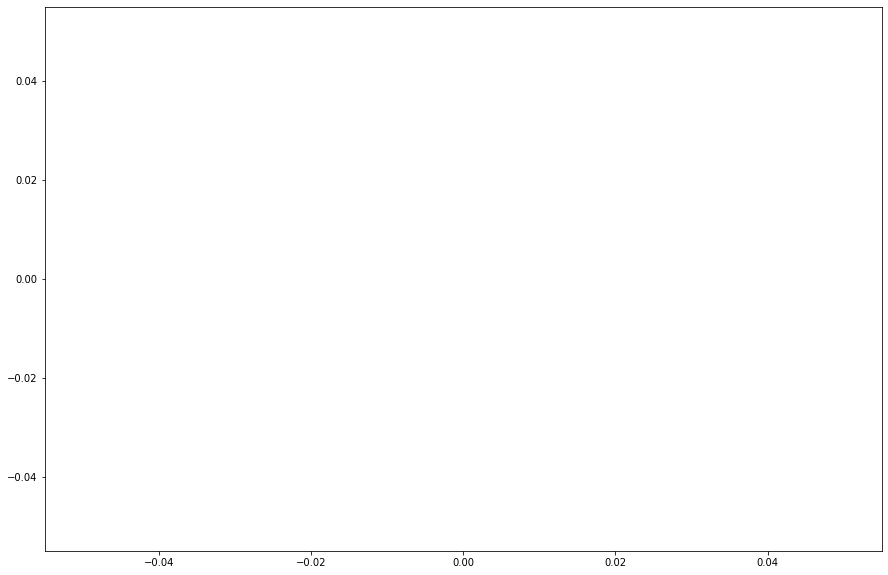

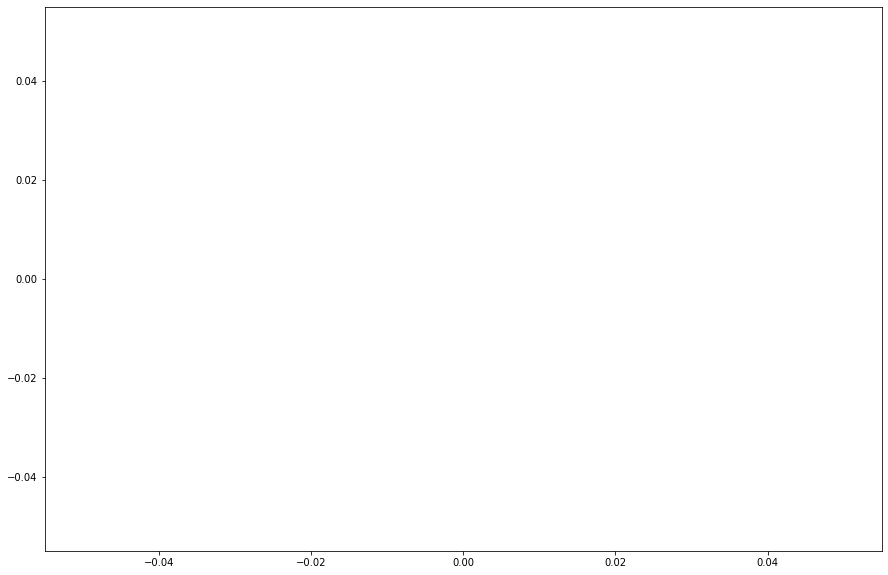

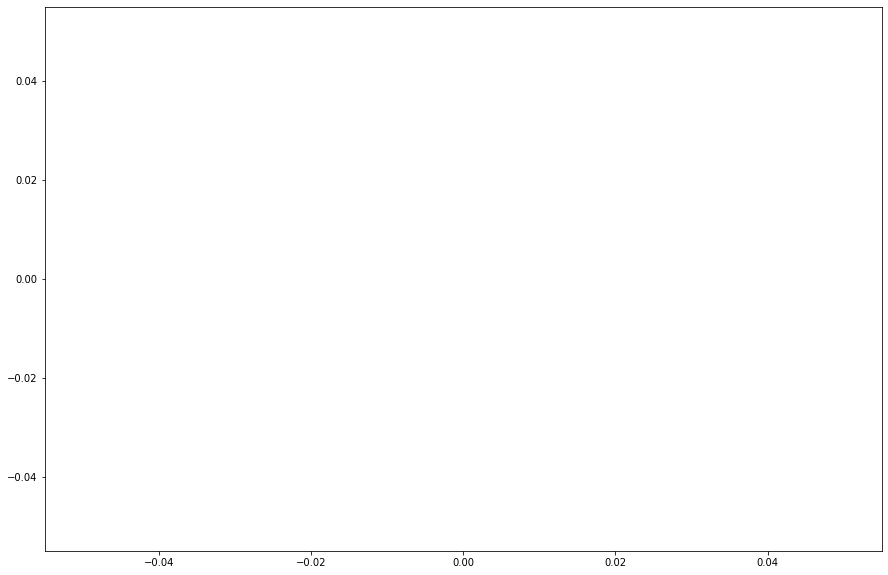

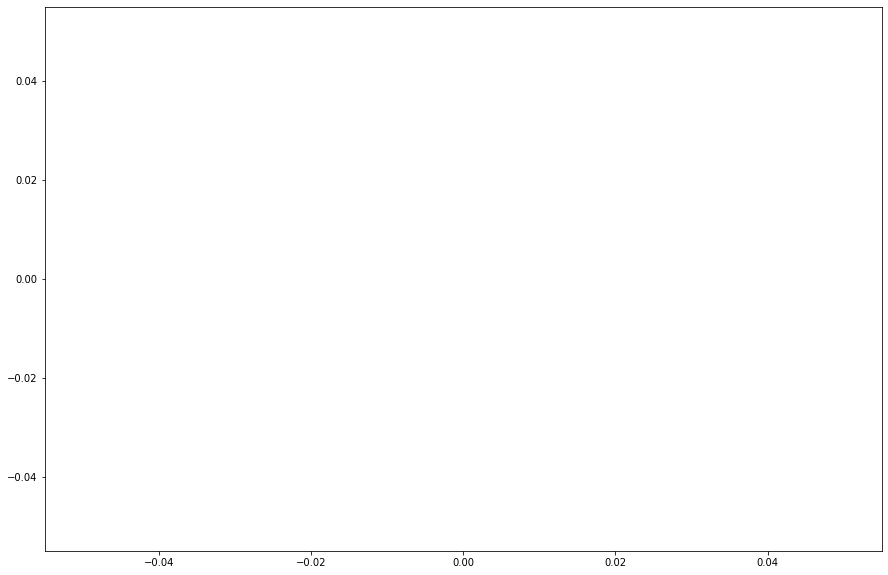

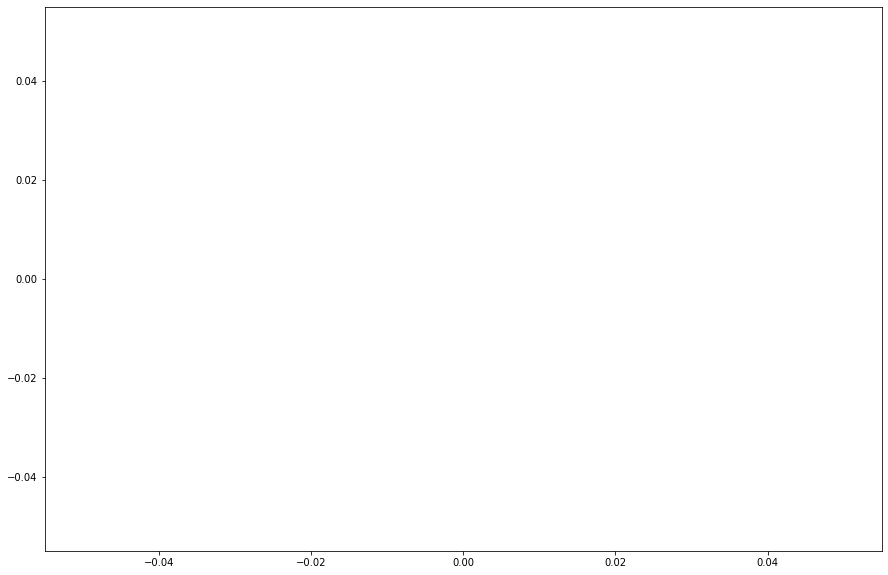

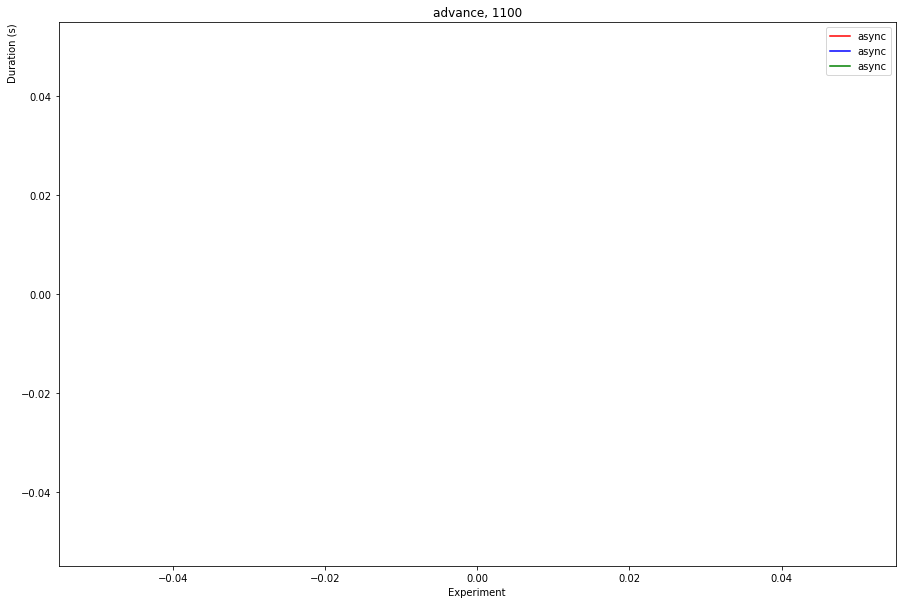

In [63]:
plot_stats2("advance", True)

IT is not only the experiment start, it is the EPOCH download start... 5 times, for each batch example

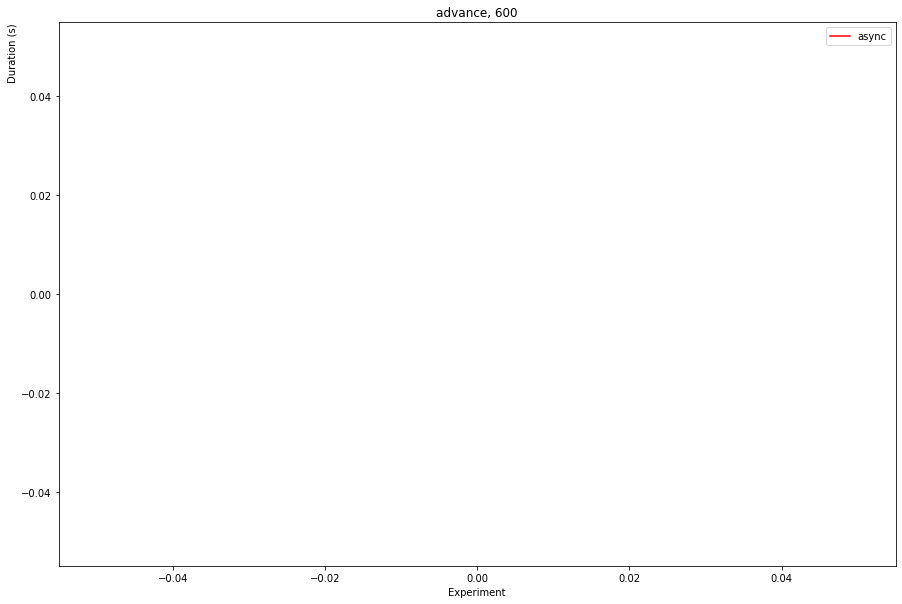

In [64]:

fn = "advance"
bs = 600
all_async = []
f_df_dataloader_s3_async=df_dataloader_s3_async[df_dataloader_s3_async["run"]=="20211017f151622_benchmark_e2e_s3_600_8_16_sync"]
mean_async = f_df_dataloader_s3_async["elapsed"].mean()
f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["batch_size"]==bs]
f_df_dataloader_s3_async=f_df_dataloader_s3_async[f_df_dataloader_s3_async["function_name"]==fn]
f_df_dataloader_s3_async=f_df_dataloader_s3_async.sort_values(["num_workers"], ascending=False)
if len(f_df_dataloader_s3_async) > 0:
    print(row["run"])
all_async += list(f_df_dataloader_s3_async["elapsed"])
del f_df_dataloader_s3_async

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(range(len(all_async)), all_async, color="red",label="async")

del all_async
ax.set_xlabel(f"Experiment", loc="center")
ax.set_ylabel("Duration (s)", loc="top")
ax.set_title(f"{fn}, {bs}", loc='center')
ax.legend()